devdocs.io

# Introduction to pygame

Pygame – это библиотека модулей для языка Python, созданная для разработки 2D игр. 

Чтобы установить pygame на вашу платформу, используйте соответствующую команду pip:
```
$ pip install pygame
```
Вы можете проверить установку, загрузив один из примеров, поставляемых вместе с библиотекой:
```
$ python3 -m pygame.examples.aliens
```
Если появится окно игры, значит, pygame установлен правильно! Если у вас возникли проблемы, то в руководстве "Начало работы" описаны некоторые известные проблемы и предостережения для всех платформ.
```
Local docs: python -m pygame.docs
```

Первое, что нужно сделать, это импортировать модуль pygame. После этого можно вывести на экран главное графическое окно игры с помощью функции set_mode() модуля display, входящего в состав библиотеки pygame:
```
display.set_mode()
Initialize a window
```
Если выполнить этот код, то появится окно размером 600x400 пикселей и сразу закроется (в Linux, в Windows может зависнуть).

Функция set_mode() принимает три аргумента – размер в виде кортежа из двух целых чисел, флаги и глубину цвета. Их можно не указывать. В этом случае окно займет весь экран, цветовая глубина будет соответствовать системной. Обычно указывают только первый аргумент – размер окна.

```
Initialize a window or screen for display
set_mode(size=(0, 0), flags=0, depth=0, display=0, vsync=0) -> Surface
```

Флаги предназначены для переключения на аппаратное ускорение, полноэкранный режим, отключения рамки окна и др. Например, команда ```pygame.display.set_mode((640, 560), pygame.RESIZABLE)``` делает окно изменяемым в размерах.

Выражение вида pygame.RESIZABLE (вместо RESIZABLE может быть любое другое слово большими буквами) обозначает обращение к той или иной константе, определенной в модуле pygame. Часто можно встретить код, в котором перед константами не пишется имя модуля (вместо, например, pygame.QUIT пишут просто QUIT). В этом случае в начале программы надо импортировать не только pygame, но и содержимое модуля locals через from … import:

import pygame
from pygame.locals import *
Однако в данном курсе мы оставим длинное обращение к встроенным константам, чтобы на этапе обучения не путать определенные в модуле и свои собственные, которые нам также придется создавать.

Функция set_mode() возвращает объект типа Surface (поверхность). В программе может быть множество объектов данного класса, но тот, что возвращает set_mode() особенный. Его называют display surface, что можно перевести как экранная (дисплейная) поверхность. Она главная.

В конечном итоге все отображается на ней с помощью функции pygame.display.update() или родственной pygame.display.flip(), и именно эту поверхность мы видим на экране монитора. Нам пока нечего отображать, мы не создавали никаких объектов. Поэтому было показано черное окно.

Функции update() и flip() модуля display обновляют содержимое окна игры. Это значит, что каждому пикселю заново устанавливается цвет. Представьте, что на зеленом фоне движется красный круг. За один кадр круг смещается на 5 пикселей. От кадра к кадру картинка целого окна изменяется незначительно, но в памяти окно будет перерисовываться полностью. Если частота составляет 60 кадров в секунду (FPS=60), то за секунду в памяти компьютера произойдет 60 обновлений множества значений, соответствующих экранным пикселям, что дает по большей части бессмысленную нагрузку на вычислительные мощности.

Если функции update() не передавать аргументы, то будут обновляться значения всей поверхности окна. Однако можно передать более мелкую прямоугольную область или список таковых. В этом случае обновляться будут только они.

Функция flip() решает проблему иным способом. Она дает выигрыш, если в set_mod() были переданы определенные флаги (аппаратное ускорение + полноэкранный режим – pygame.HWSERFACE|pygame.FULLSCREEN, двойная буферизация – pygame.DOUBLEBUFF, использование OpenGL – pygame.OPENGL). Возможно, все флаги можно комбинировать вместе (через |). При этом, согласно документации, аппаратное ускорение работает только в полноэкранном режиме.

Вернемся к нашим трем строчкам кода. Почему окно сразу закрывается? Очевидно потому, что программа заканчивается после выполнения этих выражений. Ни init(), ни set_mode() не предполагают входа в "режим циклического ожидания событий". В tkinter для этого используется метод mainloop() экземпляра Tk(). В pygame же требуется собственноручно создать бесконечный цикл, заставляющий программу зависнуть. Основная причина в том, что только программист знает, какая часть его кода должна циклически обрабатываться, а какая – нет. Например, код, создающий классы, объекты и функции не "кладут" в цикл.

Итак, создадим в программе бесконечный цикл:

```Py
#  Осторожно! Эта программа зависнет.
import pygame as pg
 
pg.display.set_mode((600, 400))
 
while 1:
    pass
```
После такого окно уже не закроется, а программа благополучно зависнет насовсем. Многократные клики по крестику не помогут. Только принудительная остановка программы через среду разработки или Ctrl+С, если запускали через терминал.

Как сделать так, чтобы программа закрывалась при клике на крестик окна, а также при нажатии Alt+F4? Pygame должен воспринимать такие действия как определенный тип событий.

Добавим в цикл магии:
```Py
#  Окно закроется, но с ошибкой.
import pygame as pg
 
pg.display.set_mode((600, 400))
 
while 1:
    for i in pg.event.get():
        if i.type == pg.QUIT:
            pg.quit()
```
При выходе будет генерироваться ошибка, пока забудем про нее. Сейчас достаточно того, что окно успешно закрывается.

Рассмотрим выражение pygame.event.get(). Модуль event библиотеки pygame содержит функцию get(), которая забирает список событий из очереди, в которую записываются все произошедшие события. То, что возвращает get() – это список. Забранные события удаляются из очереди, то есть второй раз они уже забираться не будут, а в очередь продолжают записываться новые события.

Цикл for просто перебирает схваченный на данный момент (в текущей итерации цикла) список событий. Каждое событие он присваивает переменной i или любой другой. Чтобы было понятней, перепишем программу таким образом:
```Py
#  Окно закроется, но с ошибкой.
import pygame as pg
 
pg.display.set_mode((600, 400))
 
while 1:
    events = pg.event.get()
    print(events)
    for i in events:
        if i.type == pg.QUIT:
            print(pg.QUIT)
            print(i)
            print(i.type)
            pg.quit()
```
На экране вы увидите примерно такое:
```
…
[]
[<Event(512-...)>, <Event(256-Quit {})>]
256
<Event(256-Quit {})>
256
Traceback (most recent call last):
  File "/home/pl/…/event2.py", line 7, in <module>
    events = pg.event.get()
pygame.error: video system not initialized
```
Вверху будет множество пустых квадратных скобок, которые соответствуют пустым спискам events, создаваемым на каждой итерации цикла while. И только когда окно закрывается, генерируются два события. Свойство type второго имеет значение 256, что совпадает со значением константы QUIT.

В pygame событие – это объект класса Event. А если это объект, то у него есть атрибуты (свойства и методы). В данном случае мы отслеживаем только те события, у которых значение свойства type совпадает со значением константы QUIT модуля pygame. Это значение присваивается type тогда, когда происходят события нажатия на крестик или Alt+F4. Когда эти события происходят, то в данном случае мы хотим, чтобы выполнилась функция quit() модуля pygame, которая завершает его работу.

Теперь почему возникает ошибка. Функция pygame.quit() отключает (деинициализирует) pygame, но не завершает работу программы. Таким образом, после выполнения этой функции отключаются модули библиотеки pygame, но выхода из цикла и программы не происходит. Программа продолжает работу и переходит к следующей итерации цикла while (или продолжает выполнять тело данной итерации, если оно еще не закончилось).

В данном случае происходит переход к следующей итерации цикла while. И здесь выполнить функцию get() модуля event оказывается уже невозможным. Возникает исключение и программа завершается. По-сути программу завершает не функция pygame.quit(), а выброшенное, но не обработанное, исключение.

Данную проблему можно решить разными способами. Часто используют функцию exit() модуля sys. В этом случае код выглядит примерно так:
```Py
import pygame as pg
import sys
 
pg.display.set_mode((600, 400))
 
while 1:
    for i in pg.event.get():
        if i.type == pg.QUIT:
            pg.quit()
            sys.exit()
```
Сначала отключается pygame, потом происходит выход из программы. Такой вариант вероятно следует считать наиболее безопасным завершением. Команда pygame.quit() не обязательна. Если завершается программа, то отключится и pygame.

Другой вариант – не допустить следующей итерации цикла. Для этого потребуется дополнительная переменная:
```Py
import pygame as pg
 
pg.display.set_mode((600, 400))
 
play = True
while play:
    for i in pg.event.get():
        if i.type == pg.QUIT:
            play = False
```
В этом случае завершится текущая итерация цикла, но новая уже не начнется. Если в основной ветке ниже по течению нет другого кода, программа завершит свою работу.

Нередко код основной ветки программы помещают в функцию, например, main(). Она выполняется, если файл запускается как скрипт, а не импортируется как модуль. В этом случае для завершения программы проще использовать оператор return, который осуществляет выход из функции.
```Py
import pygame as pg
 
 
def main():
    pg.display.set_mode((600, 400))
 
    while True:
        for i in pg.event.get():
            if i.type == pg.QUIT:
                return
 
 
if __name__ == "__main__":
    main()
```
Теперь зададимся вопросом, с какой скоростью крутится цикл while? С большой, зависящей от мощности компьютера. Но в данном случае такая скорость не есть необходимость, она даже вредна, так как бессмысленно расходует ресурсы. Человек дает команды и воспринимает изменения куда медленнее.

Для обновления экрана в динамической игре часто используют 60 кадров в секунду, а в статической, типа пазла, достаточно будет 30-ти. Из этого следует, что циклу незачем работать быстрее.

Поэтому в главном цикле следует выполнять задержку. Делают это либо вызовом функции delay() модуля time библиотеки pygame, либо создают объект часов и устанавливают ему частоту кадров. Первый способ проще, второй – более профессиональный.
```Py
...
while 1:
    for i in pg.event.get():
        if i.type == pg.QUIT:
            sys.exit()
    pg.time.delay(20)
```
Функция delay() принимает количество миллисекунд (1000 мс = 1 с). Если передано значение 20, то за секунду экран обновится 50 раз. Другими словами, частота составит 50 кадров в секунду.
```Py
import pygame as pg
import sys
 
pg.display.set_mode((600, 400))
 
clock = pg.time.Clock()
 
while 1:
    for i in pg.event.get():
        if i.type == pg.QUIT:
            sys.exit()
    clock.tick(60)
```
Методу tick() класса Clock передается непосредственно желаемое количество кадров в секунду. Задержку он вычисляет сам. То есть если внутри цикла указано tick(60) – это не значит, что задержка будет 60 миллисекунд или произойдет 60 обновлений экрана за одну итерацию цикла. Это значит, что на каждой итерации цикла секунда делится на 60 и уже на вычисленную величину выполняется задержка.

Нередко частоту кадров выносят в отдельную константоподобную переменную:
```Py
...
FPS = 60
...
clock = pg.time.Clock()
 
while 1:
    ...
    clock.tick(FPS)
```
В начало цикла или конец вставлять задержку зависит от контекста. Если до цикла происходит отображение каких-либо объектов на экране, то скорее всего надо вставлять в начало цикла. Если первое появление объектов на экране происходит внутри цикла, то в конец.

В итоге каркас игры на Pygame должен выглядеть примерно так:
```Py
# здесь подключаются модули
import pygame
import sys
 
# здесь определяются константы,
# классы и функции
FPS = 60
 
# здесь происходит инициация,
# создание объектов
pygame.init()
pygame.display.set_mode((600, 400))
clock = pygame.time.Clock()
 
# если надо до цикла отобразить
# какие-то объекты, обновляем экран
pygame.display.update()
 
# главный цикл
while True:
 
    # задержка
    clock.tick(FPS)
 
    # цикл обработки событий
    for i in pygame.event.get():
        if i.type == pygame.QUIT:
            sys.exit()
 
    # --------
    # изменение объектов
    # --------
 
    # обновление экрана
    pygame.display.update() # Эта функция представляет собой оптимизированную версию pygame.display.flip() для программных дисплеев. Она позволяет обновлять только часть экрана, а не всю область. Если аргумент не передан, то обновляется вся область поверхности, как pygame.display.flip().
```

Посмотрим на пример:

In [1]:
# import the pygame module
import pygame

# import pygame.locals for easier
# access to key coordinates
from pygame.locals import *

# Define our square object and call super to
# give it all the properties and methods of pygame.sprite.Sprite
# Define the class for our square objects
class Square(pygame.sprite.Sprite):
	def __init__(self):
		super(Square, self).__init__()
		
		# Define the dimension of the surface
		# Here we are making squares of side 25px
		self.surf = pygame.Surface((25, 25))
		
		# Define the color of the surface using RGB color coding.
		self.surf.fill((0, 200, 255))
		self.rect = self.surf.get_rect() # Прямоугольные объекты представлены типом Rect

# initialize pygame
pygame.init()

# Define the dimensions of screen object
screen = pygame.display.set_mode((800, 600))

# instantiate all square objects
square1 = Square()
square2 = Square()
square3 = Square()
square4 = Square()

# Variable to keep our game loop running
gameOn = True

# Our game loop
while gameOn:
	# for loop through the event queue
	for event in pygame.event.get():
		
		# Check for KEYDOWN event
		if event.type == KEYDOWN:
			
			# If the Backspace key has been pressed set
			# running to false to exit the main loop
			if event.key == K_BACKSPACE:
				gameOn = False
				
		# Check for QUIT event
		elif event.type == QUIT:
			gameOn = False

	# Define where the squares will appear on the screen
	# Use blit to draw them on the screen surface
	screen.blit(square1.surf, (40, 40))
	screen.blit(square2.surf, (40, 530))
	screen.blit(square3.surf, (730, 40))
	screen.blit(square4.surf, (730, 530))

	# Update the display using flip
	pygame.display.flip()


pygame 2.4.0 (SDL 2.26.4, Python 3.9.12)
Hello from the pygame community. https://www.pygame.org/contribute.html


: 

Приведенный выше код на языке Python представляет собой простой сценарий pygame для рисования четырех квадратов голубого цвета.

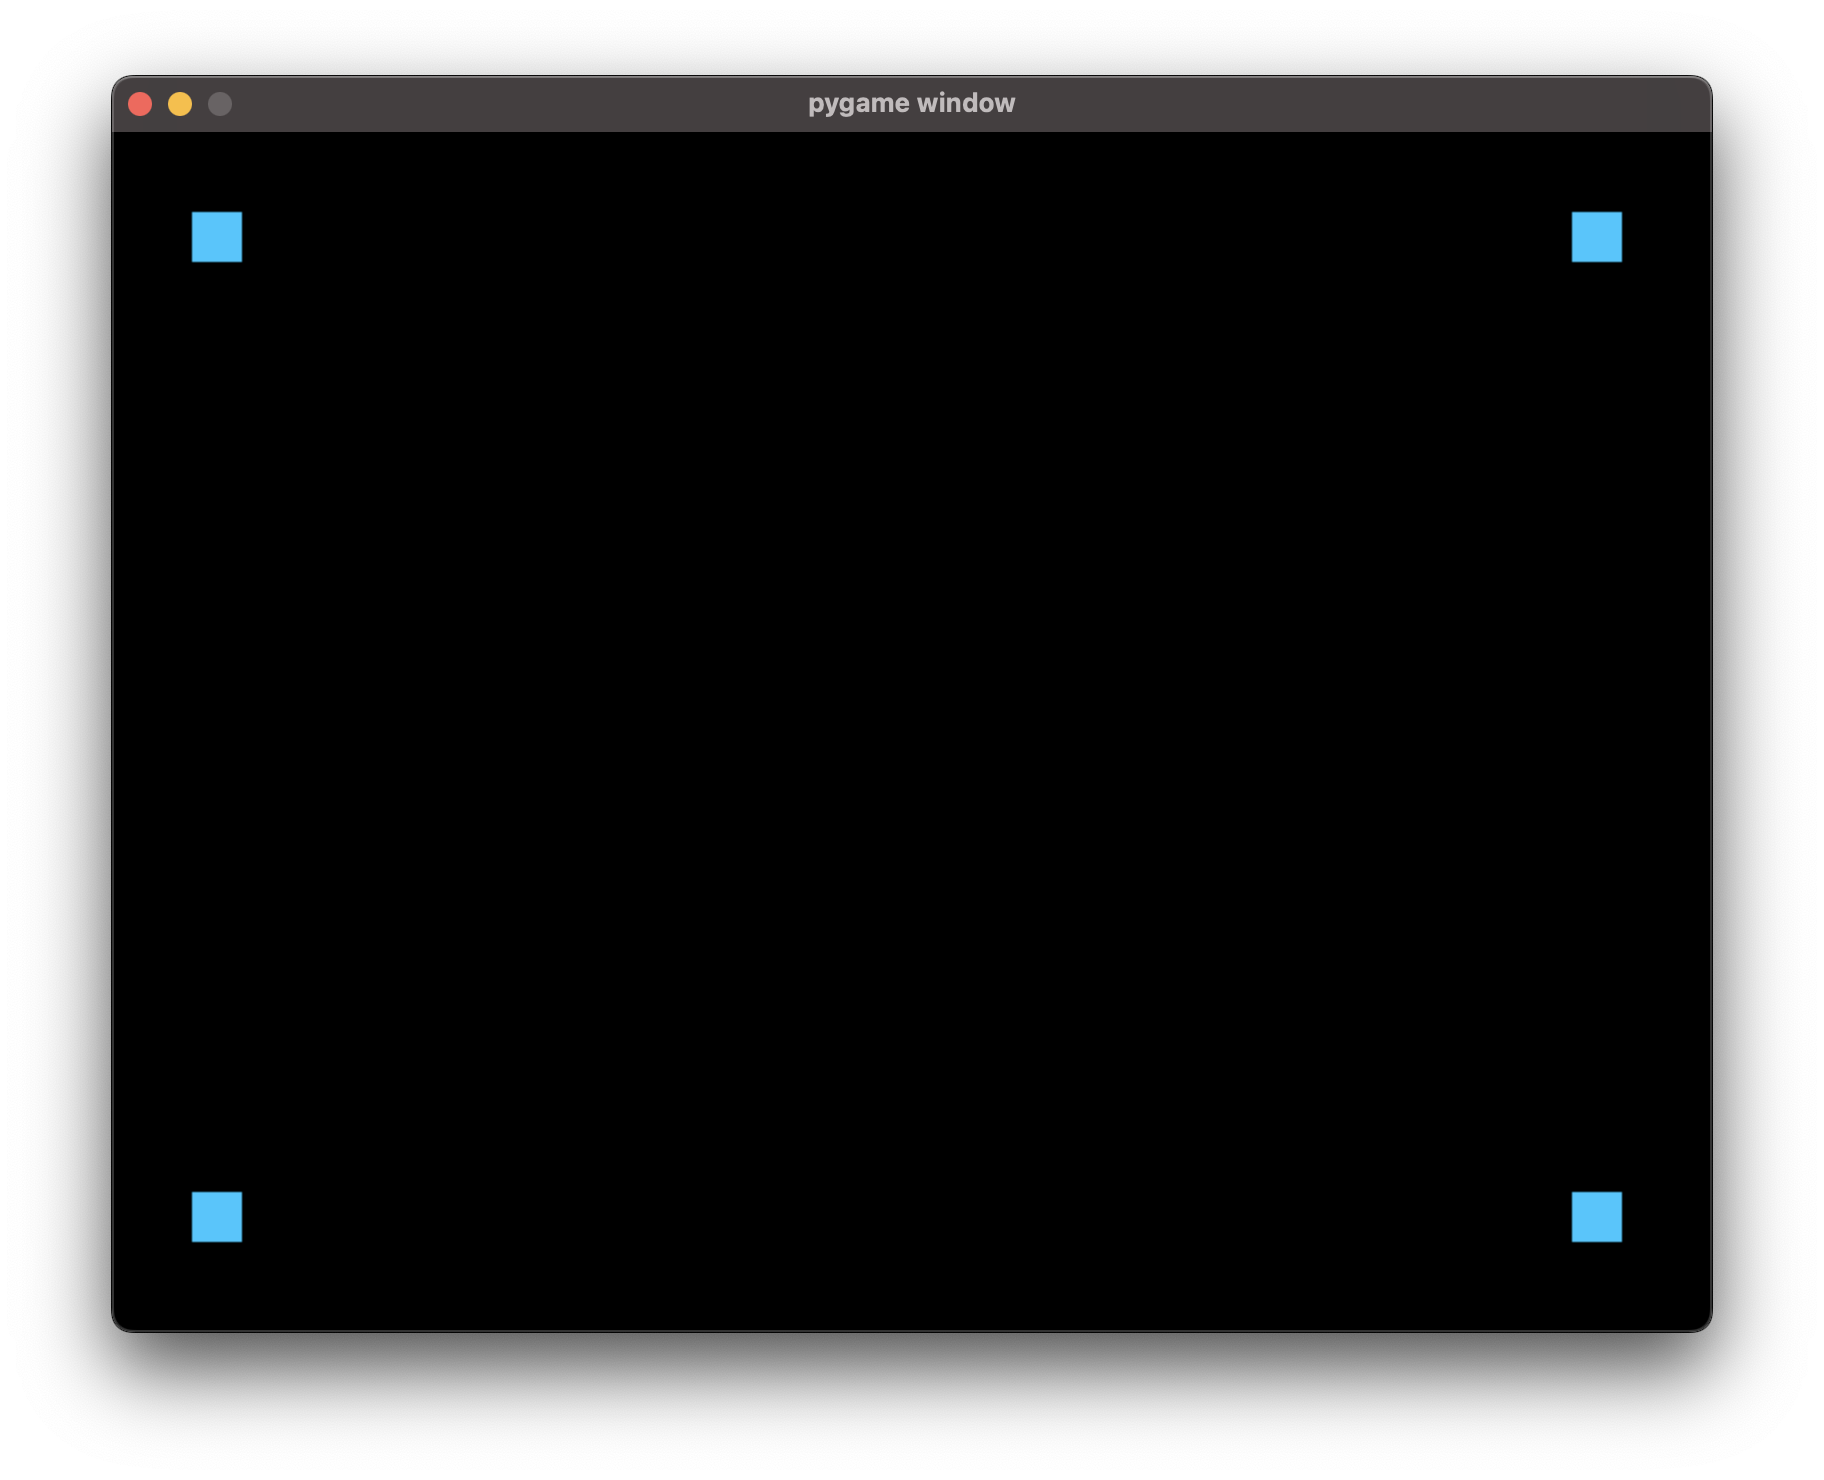

Не волнуйтесь! Мы узнаем гораздо больше о том, как заставить объект двигаться, как добавить эффекты анимации, кнопки, музыку и многое другое в следующих нескольких статьях, а пока давайте разберем этот базовый код, который содержит все необходимые элементы pygame. 

# Модуль pygame.draw
Функции модуля pygame.draw рисуют геометрические примитивы на поверхности – экземпляре класса Surface. В качестве первого аргумента они принимают поверхность. Поэтому при создании той или иной поверхности ее надо связать с переменной, чтобы потом было что передать в функции модуля draw.

Поскольку мы пока используем только одну поверхность – главную оконную, то ее будем указывать в качестве первого параметра, а при создании свяжем с переменной:
```Py
import pygame as pg
import sys
 
sc = pg.display.set_mode((300, 200))
 
# здесь будут рисоваться фигуры
 
pg.display.update()
 
while 1:
    for i in pg.event.get():
        if i.type == pg.QUIT:
            sys.exit()
    pg.time.delay(1000)
```

В большинстве случаев фигуры прорисовывают внутри главного цикла, так как от кадра к кадру картинка на экране должна меняться. Поэтому на каждой итерации цикла в функции модуля draw передаются измененные аргументы (например, каждый раз меняется координата x).

Однако у нас пока не будет никакой анимации, и нет смысла перерисовывать фигуры на одном и том же месте на каждой итерации цикла. Поэтому создавать примитивы будем в основной ветке программы. На данном этапе цикл while нужен лишь для того, чтобы программа самопроизвольно не завершалась.

После прорисовки, чтобы увидеть изменения в окне игры, необходимо выполнить функцию update() или flip() модуля display. Иначе окно не обновится. Рисование на поверхности – одно, а обновление состояния главного окна – другое. Представьте, что в разных местах тела главного цикла на поверхности прорисовываются разные объекты. Если бы каждое такое действие приводило к автоматическому обновлению окна, то за одну итерацию оно обновлялось бы несколько раз. Это приводило бы как минимум к бессмысленной трате ресурсов, так как скорость цикла связана с FPS.

Итак, первый аргумент функций рисования – поверхность, на которой размещается фигура. В нашем случае это будет sc. Вторым обязательным аргументом является цвет. Цвет задается в формате RGB, используется трехэлементный целочисленный кортеж. Например, (255, 0, 0) определяет красный цвет.

Далее идут специфичные для каждой фигуры аргументы. Последним у большинства является толщина контура.

Все функции модуля draw возвращают экземпляры класса Rect – прямоугольные области, имеющие координаты, длину и ширину. Не путайте функцию rect() модуля draw и класс Rect, это разные вещи.

Начнем с функции rect() модуля draw:
```Py
pygame.draw.rect(sc, (255, 255, 255), 
                 (20, 20, 100, 75))
pygame.draw.rect(sc, (64, 128, 255), 
                 (150, 20, 100, 75), 8)
```

Функции для рисования графических фигур

**pygame.draw.rect(Surface, color, Rect, width=0)**
Нарисовать прямоугольник Rect на поверхности Surface, цветом color. Если толщина линии width равна нулю, прямоугольник закрашивается.

**pygame.draw.line(Surface, color, start_pos, end_pos, width=1)**
Нарисовать линию на поверхности Surface, цветом color, с началом в точке start_pos, концом в точке end_pos и толщиной линии width.

**pygame.draw.lines(Surface, color, closed, pointlist, width=1)**
Нарисовать линию, соединяющую точки из последовательности pointlist на поверхности Surface, цветом color, с толщиной линии width. Каждая точка представлена парой координат. Если параметр closed равен True, конечная точка соединяется с начальной.

**pygame.draw.circle(Surface, color, pos, radius, width=0)**
Нарисовать окружность на поверхности Surface, цветом color, с центром в точке pos и радиусом radius. Если толщина линии width равна нулю, окружность закрашивается.

**pygame.draw.ellipse(Surface, color, Rect, width=0)**
Нарисовать эллипс, ограниченный прямоугольником Rect, на поверхности Surface, цветом color. Если толщина линии width равна нулю, эллипс закрашивается.

**pygame.draw.polygon(Surface, color, pointlist, width=0)**
Нарисовать многоугольник по точкам из последовательности pointlist на поверхности Surface, цветом color, с толщиной линии width. Каждая точка представлена парой координат. Если толщина линии width равна нулю многоугольник закрашивается.

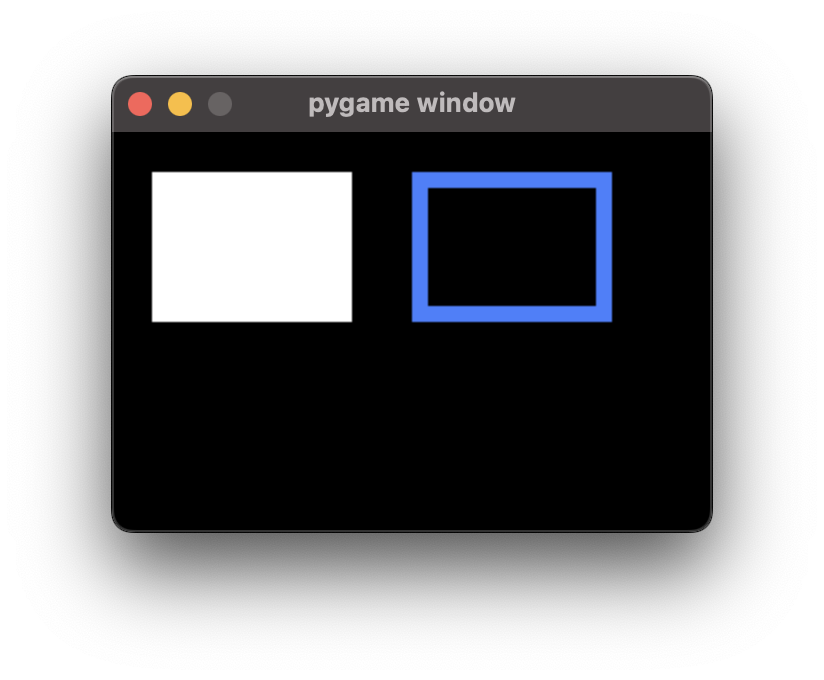

Если указывается толщина контура (последний аргумент во второй строке), то прямоугольник будет незаполненным, а цвет определит цвет рамки. Третьим аргументом является кортеж из четырех чисел. Первые два определяют координаты верхнего левого угла прямоугольника, вторые – его ширину и высоту.

Следует отметить, что в функцию draw.rect() и некоторые другие третьим аргументом можно передавать не кортеж, а заранее созданный экземпляр Rect. В примере ниже показан такой вариант.
```Py
WHITE = (255, 255, 255)
BLACK = (0, 0, 0)
GRAY = (125, 125, 125)
LIGHT_BLUE = (64, 128, 255)
GREEN = (0, 200, 64)
YELLOW = (225, 225, 0)
PINK = (230, 50, 230)
 
r1 = pygame.Rect((150, 20, 100, 75))
 
pygame.draw.rect(sc, WHITE, (20, 20, 100, 75))
pygame.draw.rect(sc, LIGHT_BLUE, r1, 8)
```

Чтобы нарисовать линию, а точнее – отрезок, надо указать координаты его концов. При этом функция line() рисует обычную линию, aaline() – сглаженную (толщину для последней указать нельзя):
```Py
pygame.draw.line(sc, WHITE, 
                 [10, 30], 
                 [290, 15], 3)
pygame.draw.line(sc, WHITE, 
                 [10, 50], 
                 [290, 35])
pygame.draw.aaline(sc, WHITE, 
                   [10, 70], 
                   [290, 55])
```

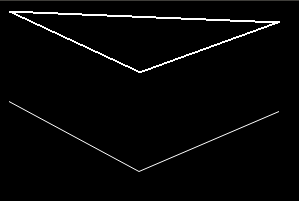

Функция polygon() рисует произвольный многоугольник. Задаются координаты вершин.
```Py
pygame.draw.polygon(sc, WHITE, 
                    [[150, 10], [180, 50], 
                     [90, 90], [30, 30]])
pygame.draw.polygon(sc, WHITE, 
                    [[250, 110], [280, 150], 
                     [190, 190], [130, 130]])
pygame.draw.aalines(sc, WHITE, True, 
                    [[250, 110], [280, 150], 
                     [190, 190], [130, 130]])
```

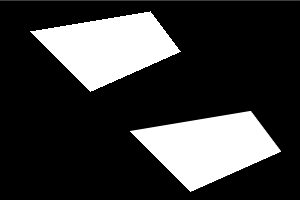

Сглаженная ломаная здесь повторяет контур многоугольника, чем сглаживает его ребра.

Так же как в случае rect() для polygon() можно указать толщину контура.

Функция circle() рисует круги. Указывается центр окружности и радиус:
```Py
pygame.draw.circle(sc, YELLOW, 
                   (100, 100), 50)
pygame.draw.circle(sc, PINK, 
                   (200, 100), 50, 10)
```

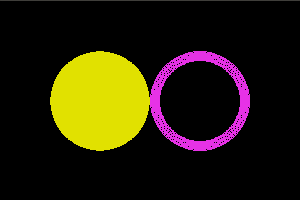

И другие фигуры.

### Анимация

На данном этапе мы уже готовы создать анимацию. Никакого движения объектов на экране монитора нет. Просто от кадра к кадру изменяются цвета пикселей экрана. Например, пиксель с координатами (10, 10) светится синим цветом, в следующем кадре синим загорается пиксель (11, 11), в то время как (10, 10) становится таким же как фон. В следующем кадре синей будет только точка (12, 12) и так далее. При этом человеку будет казаться, что синяя точка движется по экрану по диагонали.

Суть алгоритма в следующем. Берем фигуру. Рисуем ее на поверхности. Обновляем главное окно, человек видит картинку. Стираем фигуру. Рисуем ее с небольшим смещением от первоначальной позиции. Снова обновляем окно и так далее.

Как "стереть" старую фигуру? Для этого используется метод fill() объекта Surface. В качестве аргумента передается цвет, т. е. фон можно сделать любым, а не только черным, который задан по-умолчанию.

Ниже в качестве примера приводится код анимации круга. Объект появляется с левой стороны, доходит до правой, исчезает за ней. После этого снова появляется слева. Ваша задача написать код анимации квадрата, который перемещается от левой границе к правой, касается ее, но не исчезает за ней. После этого возвращается назад – от правой границы к левой, касается ее, опять двигается вправо. Циклы движения квадрата повторяются до завершения программы.

In [1]:

import pygame
import sys
 
FPS = 60
WIN_WIDTH = 400
WIN_HEIGHT = 100
WHITE = (255, 255, 255)
ORANGE = (255, 150, 100)
 
clock = pygame.time.Clock()
sc = pygame.display.set_mode((WIN_WIDTH, WIN_HEIGHT)) # создаём главную поверхность
 
# радиус будущего круга
r = 30
# координаты круга
# скрываем за левой границей
x = 0 - r
# выравнивание по центру по вертикали
y = WIN_HEIGHT // 2
 
while 1:
    for i in pygame.event.get():
        if i.type == pygame.QUIT:
            sys.exit()
 
    # заливаем фон
    sc.fill(WHITE) # он меняет всё на белый, закрашивает
    # рисуем круг
    pygame.draw.circle(sc, ORANGE, (x, y), r)
    # обновляем окно
    pygame.display.update()
 
    # Если круг полностью скрылся
    # за правой границей,
    if x >= WIN_WIDTH + r:
        # перемещаем его за левую
        x = 0 - r
    else:  # Если еще нет,
        # на следующей итерации цикла
        # круг отобразится немного правее
        x += 2
 
    clock.tick(FPS)


pygame 2.4.0 (SDL 2.26.4, Python 3.9.12)
Hello from the pygame community. https://www.pygame.org/contribute.html


SystemExit: 

c:\Users\ACER\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3377: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


: 

### События клавиатуры

Человек может управлять объектами в игре в основном с помощь клавиатуры, мыши, джойстика. Когда на "манипуляторах" что-то двигается или нажимается, то возникают события определенных типов. Обработкой событий занимается модуль pygame.event, который включает ряд функций, наиболее важная из которых уже ранее рассмотренная pygame.event.get(), которая забирает из очереди произошедшие события.

В pygame, когда фиксируется то или иное событие, создается соответствующий ему объект от класса Event. Уже с этими объектами работает программа. Экземпляры данного класса имеют только свойства, у них нет методов. У всех экземпляров есть свойство type. Набор остальных свойств события зависит от значения type.

События клавиатуры могут быть двух типов (иметь одно из двух значений type) – клавиша была нажата, клавиша была отпущена. Если вы нажали клавишу и отпустили, то в очередь событий будут записаны оба. Какое из них обрабатывать, зависит от контекста игры. Если вы зажали клавишу и не отпускаете ее, то в очередь записывается только один вариант – клавиша нажата.

Событию типа "клавиша нажата" в поле type записывается числовое значение, совпадающее со значением константы pygame.KEYDOWN. Событию типа "клавиша отпущена" в поле type записывается значение, совпадающее со значением константы pygame.KEYUP.

У обоих типов событий клавиатуры есть атрибуты key и mod. В key записывается конкретная клавиша, которая была нажата или отжата. В mod – клавиши-модификаторы (Shift, Ctrl и др.), которые были зажаты в момент нажатия или отжатия обычной клавиши. У событий KEYDOWN также есть поле unicode, куда записывается символ нажатой клавиши (тип данных str).

Рассмотрим, как это работает. Пусть в центре окна имеется круг, который можно двигать по горизонтали клавишами стрелок клавиатуры:

In [1]:

import pygame
import sys
 
FPS = 60
W = 700  # ширина экрана
H = 300  # высота экрана
WHITE = (255, 255, 255)
BLUE = (0, 70, 225)
 
sc = pygame.display.set_mode((W, H))
clock = pygame.time.Clock()
 
# координаты и радиус круга
x = W // 2
y = H // 2
r = 50
 
while 1:
    for i in pygame.event.get():
        if i.type == pygame.QUIT:
            sys.exit()
        elif i.type == pygame.KEYDOWN:
            if i.key == pygame.K_LEFT:
                x -= 3
            elif i.key == pygame.K_RIGHT:
                x += 3
 
    sc.fill(WHITE)
    pygame.draw.circle(sc, BLUE, (x, y), r)
    pygame.display.update()
    clock.tick(FPS)


pygame 2.4.0 (SDL 2.26.4, Python 3.9.12)
Hello from the pygame community. https://www.pygame.org/contribute.html


SystemExit: 

c:\Users\ACER\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3377: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


: 

В цикле обработки событий теперь проверяется не только событие выхода, но также нажатие клавиш. Сначала необходимо проверить тип, потому что не у всех событий есть атрибут key. Если сразу начать проверять key, то сгенерируется ошибка по той причине, что могло произойти множество событий. Например, движение мыши, у которого нет поля key. Соответственно, попытка взять значение из несуществующего поля (i.key) приведет к генерации исключения.

Часто проверку и типа и клавиши записывают в одно логическое выражение ```(i.type == pygame.KEYDOWN and i.key == pygame.K_LEFT)```. В Python так можно делать потому, что если первая часть сложного выражения возвращает ложь, то вторая часть уже не проверяется.

Если какая-либо клавиша была нажата, то проверяется, какая именно. В данном случае обрабатываются только две клавиши. В зависимости от этого меняется значение координаты x.

Проблема данного кода в том, что при выполнении программы, чтобы круг двигался, надо постоянно нажимать и отжимать клавиши. Если просто зажать их на длительный период, то объект не будет постоянно двигаться. Он сместиться только одноразово на 3 пикселя.

Так происходит потому, что событие нажатия на клавишу происходит один раз, сколь долго бы ее не держали. Это событие было забрано из очереди функцией get() и обработано. Его больше нет. Поэтому приходится генерировать новое событие, еще раз нажимая на клавишу.

Как быть, если по логике вещей надо, чтобы шар двигался до тех пор, пока клавиша зажата? Когда же она отпускается, шар должен останавливаться. Первое, что надо сделать, – это перенести изменение координаты x в основную ветку главного цикла while. В таком случае на каждой его итерации координата будет меняться, а значит шар двигаться постоянно.

Во-вторых, в цикле обработки событий нам придется следить не только за нажатием клавиши, но и ее отжатием. Когда клавиша нажимается, какая-либо переменная, играющая роль флага, должна принимать одно значение, когда клавиша отпускается эта же переменная должна принимать другое значение.

В основном теле while надо проверять значение этой переменной и в зависимости от него менять или не менять значение координаты.


In [1]:
import pygame
import sys
 
FPS = 60
W = 700  # ширина экрана
H = 300  # высота экрана
WHITE = (255, 255, 255)
BLUE = (0, 70, 225)
RIGHT = "to the right"
LEFT = "to the left"
STOP = "stop"
 
sc = pygame.display.set_mode((W, H))
clock = pygame.time.Clock()
 
# координаты и радиус круга
x = W // 2
y = H // 2
r = 50
 
motion = STOP
 
while 1:
    for i in pygame.event.get():
        if i.type == pygame.QUIT:
            sys.exit()
        elif i.type == pygame.KEYDOWN:
            if i.key == pygame.K_LEFT:
                motion = LEFT
            elif i.key == pygame.K_RIGHT:
                motion = RIGHT
        elif i.type == pygame.KEYUP:
            if i.key in [pygame.K_LEFT,
                         pygame.K_RIGHT]:
                motion = STOP
 
    sc.fill(WHITE)
    pygame.draw.circle(sc, BLUE, (x, y), r)
    pygame.display.update()
 
    if motion == LEFT:
        x -= 3
    elif motion == RIGHT:
        x += 3

    # если выходит за границы перемещаем 
    if x >= W + r:
        # перемещаем его за левую
        x = 0 - r
    elif x <= 0 -r:
        x = W+r
 
    clock.tick(FPS)

pygame 2.4.0 (SDL 2.26.4, Python 3.9.12)
Hello from the pygame community. https://www.pygame.org/contribute.html


SystemExit: 

c:\Users\ACER\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3377: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


: 

Использовать константы не обязательно, можно сразу присваивать строки или даже числа (например, motion = 1 обозначает движение вправо, -1 – влево, 0 – остановка). Однако константы позволяют легче понимать и обслуживать в дальнейшем код, делают его более информативным. Лучше привыкнуть к такому стилю.

Должно проверяться отжатие только двух клавиш. Если проверять исключительно KEYUP без последующей конкретизации, то отжатие любой клавиши приведет к остановке, даже если в это время будет по-прежнему зажиматься клавиша влево или вправо. Выражение i.key in [pygame.K_LEFT, pygame.K_RIGHT] обозначает, что если значение i.key совпадает с одним из значений в списке, то все выражение возвращает истину.

На самом деле существует способ по-проще. В библиотеке pygame с событиями работает не только модуль event. Так модуль pygame.key включает функции, связанные исключительно с клавиатурой. Здесь есть функция pygame.key.get_pressed(), которая возвращает кортеж двоичных значений. Индекс каждого значения соответствует своей клавиатурной константе. Само значение равно 1, если клавиша нажата, и 0 – если не нажата.

Эта функция подходит не для всех случаев обработки клавиатурных событий, но в нашем подойдет. Поэтому мы можем упростить код до такого варианта:

In [ ]:

import pygame
import sys
 
FPS = 60
W = 700  # ширина экрана
H = 300  # высота экрана
WHITE = (255, 255, 255)
BLUE = (0, 70, 225)
 
sc = pygame.display.set_mode((W, H))
clock = pygame.time.Clock()
 
# координаты и радиус круга
x = W // 2
y = H // 2
r = 50
 
while 1:
    for i in pygame.event.get():
        if i.type == pygame.QUIT:
            sys.exit()
 
    sc.fill(WHITE)
    pygame.draw.circle(sc, BLUE, (x, y), r)
    pygame.display.update()
 
    keys = pygame.key.get_pressed()
 
    if keys[pygame.K_LEFT]:
        x -= 3
    elif keys[pygame.K_RIGHT]:
        x += 3
 
    clock.tick(FPS)


Можно сказать, вызов get_pressed() снимает "маску" зажатых клавиш. Мы ее снимаем на каждой итерации главного цикла. Это даже не регистрация событий как таковых.

Выражение типа ```keys[pygame.K_LEFT]``` извлекает значение из кортежа по индексу, значение которого записано в константе K_LEFT. Если извлеченное значение True, то координата меняется.

Если необходимо, чтобы событие обрабатывалось при нажатии двух и более клавиш, то работает такое логическое выражение: ```keys[pygame.K_LEFT] and keys[pygame.K_a]``` (одновременное нажатие стрелки 'влево' и буквы 'a'). 
Весь перечень констант pygame, соответствующих клавишам клавиатуры, смотрите в документации: https://www.pygame.org/docs/ref/key.html

# События мыши

В Pygame обрабатываются три типа событий мыши:

* нажатие кнопки (значение свойства type события соответствует константе pygame.MOUSEBUTTONDOWN),

* отпускание кнопки (MOUSEBUTTONUP),

* перемещение мыши (MOUSEMOTION).

Какая именно кнопка была нажата, записывается в другое свойство события – button. Для левой кнопки это число 1, для средней – 2, для правой – 3, для прокручивания вперед – 4, для прокручивания назад – 5. У событий MOUSEMOTION вместо button используется свойство buttons, в которое записывается состояние трех кнопок мыши (кортеж из трех элементов).

Другим атрибутом мышиных типов событий является свойство pos, в которое записываются координаты происшествия (кортеж из двух чисел).

Таким образом, если вы нажали правую кнопку мыши точно в середине окна размером 200x200, то будет создан объект типа Event с полями event.type = pygame.MOUSEBUTTONDOWN, event.button = 3, event.pos = (100, 100).

У событий MOUSEMOTION есть еще один атрибут – rel. Он показывает относительное смещение по обоим осям. С помощью него, например, можно отслеживать скорость движения мыши.

Код ниже создает фигуры в местах клика мыши. Нажатие средней кнопки очищает поверхность.

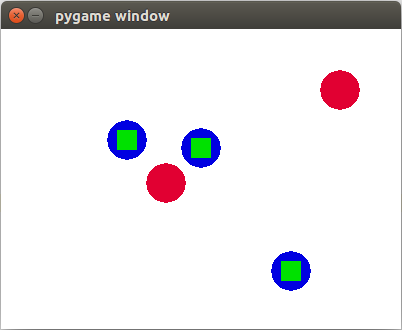

In [1]:

import pygame as pg
import sys
 
WHITE = (255, 255, 255)
RED = (225, 0, 50)
GREEN = (0, 225, 0)
BLUE = (0, 0, 225)
 
sc = pg.display.set_mode((400, 300))
sc.fill(WHITE)
pg.display.update()
 
while 1:
    for i in pg.event.get():
        if i.type == pg.QUIT:
            sys.exit()
        if i.type == pg.MOUSEBUTTONDOWN:
            if i.button == 1:
                pg.draw.circle(
                    sc, RED, i.pos, 20)
                pg.display.update()
            elif i.button == 3:
                pg.draw.circle(
                    sc, BLUE, i.pos, 20)
                pg.draw.rect(
                    sc, GREEN,
                    (i.pos[0] - 10,
                     i.pos[1] - 10,
                     20, 20))
                pg.display.update()
            elif i.button == 2:
                sc.fill(WHITE)
                pg.display.update()
 
    pg.time.delay(20)

pygame 2.4.0 (SDL 2.26.4, Python 3.9.12)
Hello from the pygame community. https://www.pygame.org/contribute.html


SystemExit: 

c:\Users\ACER\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3377: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


: 

В функции модуля draw вместо координат передается значение поля pos события. В pos хранятся координаты клика. В случае с функцией rect() извлекаются отдельные элементы кортежа pos. Вычитание числа 10 используется для того, чтобы середина квадрата, сторона которого равна 20-ти пикселям, точно соответствовала месту клика. Иначе в месте клика будет находиться верхний левый угол квадрата.

Функцию update() не обязательно вызывать три раза в ветках if-elif-elif. Ее можно вызвать в основном теле главного цикла. Однако в этом случае, когда кликов не происходит, она будет выполнять зря.

Также как в случае с клавиатурой в pygame есть свой модуль для событий мыши. Если нужно отслеживать длительное зажатие ее кнопок, следует воспользоваться функцией get_pressed() модуля pygame.mouse. Здесь же есть функция для считывания позиции курсора – get_pos(). Следующий код рисует синий круг в местах клика левой кнопкой мыши:

In [1]:
import pygame as pg
import sys
 
WHITE = (255, 255, 255)
BLUE = (0, 0, 225)
 
sc = pg.display.set_mode((400, 300))
sc.fill(WHITE)
pg.display.update()
 
while 1:
    for i in pg.event.get():
        if i.type == pg.QUIT:
            sys.exit()
 
    pressed = pg.mouse.get_pressed() # возвращает кортеж, если кнопка нажата значение True
    pos = pg.mouse.get_pos()
    print(pressed)
    if pressed[2]:
        pg.draw.circle(sc, BLUE, pos, 5)
        pg.display.update()
 
    pg.time.delay(20)

pygame 2.4.0 (SDL 2.26.4, Python 3.9.12)
Hello from the pygame community. https://www.pygame.org/contribute.html
(False, False, False)
(False, False, False)
(False, False, False)
(False, False, False)
(False, False, False)
(False, False, False)
(False, False, False)
(False, False, False)
(False, False, False)
(False, False, False)
(False, False, False)
(False, False, False)
(False, False, False)
(False, False, False)
(False, False, False)
(False, False, False)
(False, False, False)
(False, False, False)
(False, False, False)
(False, False, False)
(False, False, False)
(False, False, False)
(False, False, False)
(False, False, False)
(False, False, False)
(False, False, False)
(False, False, False)
(False, False, False)
(False, False, False)
(False, False, False)
(False, False, False)
(False, False, False)
(False, False, False)
(False, False, False)
(False, False, False)
(False, False, False)
(False, False, False)
(False, False, False)
(False, False, False)
(False, False, False)
(False,

SystemExit: 

c:\Users\ACER\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3377: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


: 

Функция mouse.get_pressed() возвращает трехэлементный кортеж. Первый элемент (с индексом 0) соответствует левой кнопке мыши, второй – средней, третий – правой. Если значение элемента равно True, значит, кнопка нажата. Если False, значит – нет. Так выражение pressed[0] есть истина, если под нулевым индексом содержится True.

Чтобы скрыть курсор (например, в игре, где управление осуществляется исключительно клавиатурой), надо воспользоваться функцией pygame.mouse.set_visible(), передав в качестве аргумента False.

Так можно привязать графический объект к курсору (в данном случае привязывается квадрат):

In [1]:
import pygame as pg
import sys
 
WHITE = (255, 255, 255)
BLUE = (0, 0, 225)
 
pg.init()
sc = pg.display.set_mode((400, 300))
sc.fill(WHITE)
pg.display.update()
 
pg.mouse.set_visible(False)
 
while 1:
    for i in pg.event.get():
        if i.type == pg.QUIT:
            sys.exit()
 
    sc.fill(WHITE)
 
    if pg.mouse.get_focused():
        pos = pg.mouse.get_pos()
        pg.draw.rect(
            sc, BLUE, (pos[0] - 10,
                       pos[1] - 10,
                       20, 20))
 
    pg.display.update()
    pg.time.delay(20)

pygame 2.4.0 (SDL 2.26.4, Python 3.9.12)
Hello from the pygame community. https://www.pygame.org/contribute.html


SystemExit: 

c:\Users\ACER\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3377: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


: 

Функцией get_pos() мы можем считывать позицию курсора, даже если он не виден. Далее в этой позиции рисуем фигуру на каждой итерации цикла.

Функция get_focused() проверяет, находится ли курсор в фокусе окна игры. Если не делать эту проверку, то при выходе курсора за пределы окна, квадрат будет постоянно прорисовываться у края окна, где произошел выход, т. е. не будет исчезать.

# Класс Surface и метод blit()

С помощью класса pygame.Surface можно создавать дополнительные поверхности. Поверхность pygame Surface используется для представления любого изображения. После этого отрисовывать их на основной, которая создается методом pygame.display.set_mode(), или друг на друге. Отрисовка выполняется с помощью метода blit().

В pygame поверхности создаются не только вызовом функции display.set_mode() или напрямую вызовом конструктора класса Surface. Также в результате выполнения ряда других функций и методов. Это связано с тем, что поверхности играют важную роль, так как в конечном итоге именно они отображаются на экране. Кроме того они позволяют группировать объекты. Их можно сравнить со слоями в анимации.

При создании экземпляра Surface непосредственно от класса необходимо указать ширину и высоту, подобно тому, как это происходит при вызове set_mode(). Например:
```Py
surf = pygame.Surface((150, 150))
```
Метод blit() применяется к той поверхности, на которую "накладывается", т. е. на которой "отрисовывается", другая. Другими словами, метод blit() применяется к родительской Surface, в то время как дочерняя передается в качестве аргумента. Также в метод надо передать координаты размещения верхнего левого угла дочерней поверхности в координатной системе родительской. Например:
```Py
sc.blit(surf, (50, 20))
```
Здесь sc – основная поверхность. К ней применяется метод blit(), который на sc в ее координате 50x20 прорисовывает поверхность surf.

Пример полного кода:

In [1]:
import pygame as pg
import sys
 
sc = pg.display.set_mode((300, 200))
surf = pg.Surface((200, 150))
surf.fill((255, 255, 255))
sc.blit(surf, (50, 25))
pg.display.update()
 
while 1:
    for i in pg.event.get():
        if i.type == pg.QUIT:
            sys.exit()
    pg.time.delay(100)

pygame 2.4.0 (SDL 2.26.4, Python 3.11.1)
Hello from the pygame community. https://www.pygame.org/contribute.html


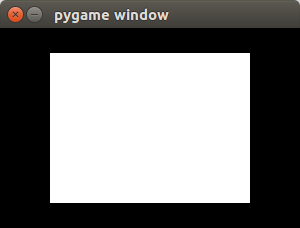

Поверхности можно делать прозрачными с помощью их метода set_alpha(). Аргумент меняется от 0 (полная прозрачность) до 255 (полная непрозрачность).

In [ ]:
import pygame as pg
import sys
 
sc = pg.display.set_mode((300, 200))
surf = pg.Surface((200, 150))
surf.fill((255, 255, 255))
surf.set_alpha(200)
 
# сначала на главной поверхности
# рисуется зеленый прямоуг
pg.draw.rect(sc, (0, 255, 0),
             (0, 80, 300, 40))
 
# поверх накладываем полупрозрачную
# белую поверхность
sc.blit(surf, (50, 25))
 
pg.display.update()
 
while 1:
    for i in pg.event.get():
        if i.type == pg.QUIT:
            sys.exit()
    pg.time.delay(100)

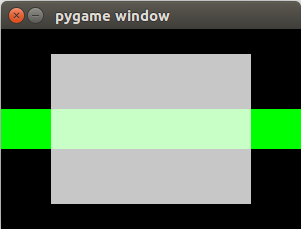

Если бы на surf располагались графические объекты, то они также стали бы полупрозрачными.

Кроме blit() и set_alpha() у поверхностей есть множество других методов. Некоторые из них будут упомянуты позже.

Если не принимать во внимание функции модуля pygame.draw, то все, что рисуется на поверхностях, делается с помощью метода blit().

Чтобы проиллюстрировать, что поверхности – это своего рода слои, запрограммируем анимацию одной поверхности (красной) на фоне другой (зеленой). Последняя может смещаться по оси y при клике мышью. При этом красный квадрат всегда будет двигаться ровно по центру по горизонтали зеленой поверхности, но не оконной.

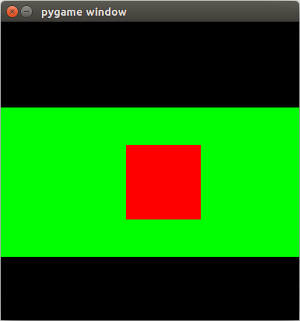

In [ ]:
from random import randint
import pygame as pg
import sys
 
sc = pg.display.set_mode((400, 400))
 
background = pg.Surface((400, 200))
background.fill((0, 255, 0))
xb = 0
yb = 100
 
hero = pg.Surface((100, 100))
hero.fill((255, 0, 0))
x = 0
y = 50
 
# порядок прорисовки важен!
background.blit(hero, (x, y))
sc.blit(background, (xb, yb))
 
pg.display.update()
 
while 1:
    for i in pg.event.get():
        if i.type == pg.QUIT:
            sys.exit()
        elif i.type == pg.MOUSEBUTTONUP:
            yb = randint(0, 200)
 
    if x < 400:
        x += 2
    else:
        x = 0
 
    sc.fill((0, 0, 0))
    background.fill((0, 255, 0))
 
    background.blit(hero, (x, y))
    sc.blit(background, (xb, yb))
 
    pg.display.update()
 
    pg.time.delay(30)

Обратите внимание на комментарий. Сначала hero прорисовывается на background. Потом background прорисовывается на sc. Если сделать наоборот, т. е. две строчки кода поменять местами, то при обновлении окна красного квадрата вы не увидите. Потому что в этом случае на sc отрисуется "старая версия" background, когда на нем еще не было hero.

Также отметим последовательность прорисовок в главном цикле игры. Сначала заливаются оба фона, иначе на них останется "след" от предыдущей итерации цикла. Далее надо заново наложить на каждый слой дочернюю для него поверхность. После этого все окно обновляется функцией update().

# Класс Rect
При разработке игр часто требуется определять границы персонажей, окружающих предметов, определять моменты их столкновений. Во всех этих задачах в PyGame используется специальный объект:

Еще одни ключевым классом в Pygame является Rect. Его экземпляры представляют собой прямоугольные области. Pygame использует объекты Rect для хранения и манипулирования прямоугольными областями. Они не имеют графического представления в окне игры. Ценность класса заключается в свойствах и методах, позволяющих управлять размещением поверхностей, выполнять проверку их перекрытия и др.

Rect'ы можно передавать в функцию pygame.display.update(). В этом случае будут обновляться только соответствующие им области.

Обратите внимание, Rect – это не класс для рисования прямоугольников, это класс для операций с прямоугольными областями и к рисованию он не имеет прямого отношения.


Экземпляры Rect создаются не только напрямую от класса. Однако начнем с этого варианта.

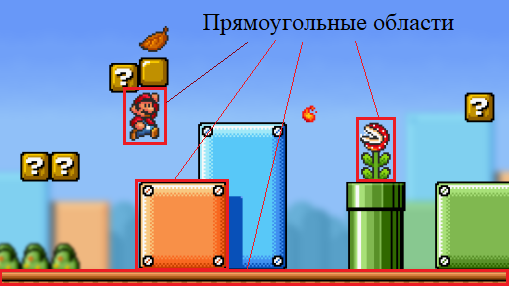

Некоторые из доступных атрибутов:

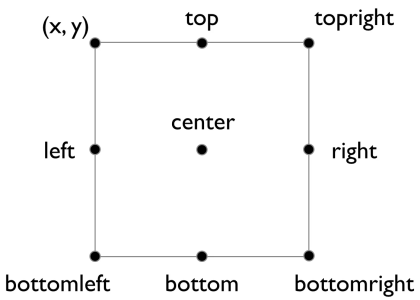

In [1]:
import pygame as pg
import sys
 
sc = pg.display.set_mode((400, 400))
 
rect1 = pg.Rect((0, 0, 30, 30))
rect2 = pg.Rect((30, 30, 30, 30))
 
print(rect1.bottomright)  # (30, 30)
print(rect2.bottomright)  # (60, 60)
 
rect2.move_ip(10, 10)
print(rect2.topleft)  # (40, 40)
 
rect1.union_ip(rect2)
print(rect1.width)  # 70
 
while 1:
    for i in pg.event.get():
        if i.type == pg.QUIT:
            sys.exit()

pygame 2.4.0 (SDL 2.26.4, Python 3.9.12)
Hello from the pygame community. https://www.pygame.org/contribute.html
(30, 30)
(60, 60)
(40, 40)
70


SystemExit: 

c:\Users\ACER\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3377: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


: 

В конструктор класса Rect передаются четыре числа – координаты x и y, ширина и высота. Мы создаем два квадрата со сторонами в 30 пикселей. Верхний левый угол первого находится в точке (0, 0), второго – (30, 30).

У объектов Rect есть более десятка свойств, связанных с их координатами и размерами. Свойство bottomright одно из них, в нем хранится координата нижнего правого угла. Понятно, что если второй квадрат начинается в точке (30, 30) и его сторона равна 30, то нижний правый угол будет в точке (60, 60).

Кроме свойств, у объектов Rect есть множество методов. Метод move_ip() смещает прямоугольную область по оси x (первый аргумент) и y (второй аргумент) на указанное количество пикселей. В данном случае если второй прямоугольник смещается на 10 пикселей по обоим осям, то его левый верхний угол окажется в точке (40, 40).

Метод union_ip() присоединяет к тому прямоугольнику, к которому применяется, другой – который передается аргументом. Когда мы отодвинули второй прямоугольник на 10 пикселей, то область, заключающая в себе оба, уже будет шириной 70 пикселей, а не 60.

Методы, у которых есть суффикс _ip, изменяют тот экземпляр Rect, к которому применяются. Есть аналогичные методы без _ip (например, move(), union()), которые возвращают новый экземпляр, т. е. старый остается без изменений.

Помимо свойств класс Rect содержит и несколько полезных методов. Например:
```
Rect.move(x, y) – возвращает новый прямоугольник со смещениями x, y;
Rect.move_ip(x, y) – меняет координаты текущего прямоугольника со смещениями x, y;
Rect.clip(Rect) – обрезает границы прямоугольника по указанным размерам переданного прямоугольника;
Rect.union(Rect) – возвращает новый прямоугольник с результатом объединения двух прямоугольников в один;
Rect.union_ip – объединяет два прямоугольника в один;
Rect.fit(Rect) – возвращает новый прямоугольник, смещенный и измененный по размеру переданного прямоугольника;
Rect.contains(Rect) – проверяет: содержится ли один прямоугольник внутри другого.
```

В метод blit() можно передавать не координаты места размещения Surface, а экземпляр Rect. Метод blit() сам возьмет из Rect координаты его верхнего левого угла:

In [ ]:
import pygame as pg
import sys
 
sc = pg.display.set_mode((300, 300))
sc.fill((200, 255, 200))
 
surf1 = pg.Surface((200, 200)) # задаём размерность
surf1.fill((220, 200, 0))  # желтая
surf2 = pg.Surface((100, 100))
surf2.fill((255, 255, 255))  # белая
 
rect = pg.Rect((70, 20, 0, 0))
 
surf1.blit(surf2, rect)
sc.blit(surf1, rect)
 
pg.display.update()
 
while 1:
    for i in pg.event.get():
        if i.type == pg.QUIT:
            sys.exit()

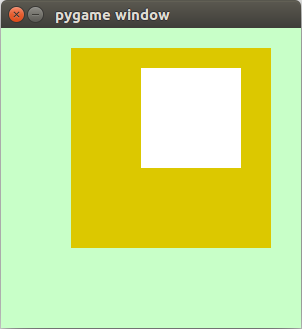

Мы размещаем желтую поверхность на зеленой, а белую – на желтой. В обоих случаях – в координатах (70, 20). Однако в каждом случае точка берется относительно своей родительской поверхности.

Еще один момент, на который надо обратить внимание. Прямоугольная область была определена нулевой размерностью. При этом поверхности отобразились соответственно своим собственным размерам. Это значит, что поверхности не располагаются внутри rect'ов. Они к ним никакого отношения не имеют. Из прямоугольников blit() взял только координаты.

С другой стороны, экземпляры Rect предназначены для хранения не только координат, но и размеров поверхностей. Размеры в основном нужны для проверки коллизий. В большинстве случаев сначала создается поверхность. Далее с нее снимается "маска", т. е. создается экземпляр Rect, который будет иметь те же размеры, что и она. Все дальнейшее "взаимодействие" поверхности с другими объектами (размещение, проверка столкновений и вхождений) происходит через "связанный" с ней Rect.

In [ ]:
import pygame
import sys
 
sc = pygame.display.set_mode((300, 300))
sc.fill((200, 255, 200))
 
surf2 = pygame.Surface((100, 100))
surf2.fill((255, 255, 255))  # белая
 
rect = surf2.get_rect()  # создается Rect
 
print(surf2.get_width())  # вывод 100
print(rect.width)  # 100
print(rect.x, rect.y)  # 0 0
 
sc.blit(surf2, rect)
pygame.display.update()
 
while 1:
    for i in pygame.event.get():
        if i.type == pygame.QUIT:
            sys.exit()
 
    rect.x += 1
 
    sc.fill((200, 255, 200))
    sc.blit(surf2, rect)
    pygame.display.update()
 
    pygame.time.delay(20)

Метод поверхности get_rect() возвращает экземпляр Rect, ширина и высота которого совпадают с таковыми поверхности. В примере метод get_width() возвращает ширину поверхности, также выводится ширина прямоугольника (rect.width), чтобы показать, что они равны.

Если в get_rect() не передавать аргументы, то верхний левый угол экземпляра Rect будет в точке (0, 0).

В цикле мы изменяем координату x прямоугольной области, после чего передаем уже измененный rect в метод blit(). В результате поверхность будет двигаться.

Мораль такова. Нам не нужно вводить множество переменных для хранения координат и размеров. Для каждой поверхности заводится свой rect, который хранит в себе множество свойств и включает ряд полезных методов.

В get_rect() можно передавать именованные аргументы, являющиеся свойствами Rect, и устанавливать им значения. Например, surf.get_rect(topleft=(100, 50)) вернет прямоугольник, чей левый угол будет в точке (100, 50), а размер совпадать с размерами surf. Выражение surf.get_rect(centerx=100) вернет прямоугольник, координата x центра которого будет иметь значение 100. При этом остальные координаты будут вычислены, исходя из размеров поверхности.

# Модуль pygame.font

Классы Font и SysFont находятся в модуле pygame.font и предназначены для работы со шрифтами и текстом. Чтобы создавать от этих классов объекты, модуль pygame.font необходимо предварительно инициализировать командой pygame.font.init(), или выполнить инициализацию всех вложенных модулей библиотеки Pygame командой pygame.init().

От классов pygame.font.Font и pygame.font.SysFont создаются объекты-шрифты. Второй класс берет системные шрифты, поэтому конструктору достаточно передать имя шрифта. Конструктору Font надо передавать имя файла шрифта. Например:
```Py
pygame.font.SysFont('arial', 36)
pygame.font.Font('/адрес/Arial.ttf', 36)
```
Пример полного адреса в системе Linux – "/usr/share/fonts/truetype/msttcorefonts/Arial.ttf".

Второй аргумент – это размер шрифта в пикселях.

Узнать, какие шрифты есть в системе, можно с помощью функции get_fonts():
```Py
>>> pygame.font.get_fonts()
['cmmi10', 'umeminchos3', 'kacstbook' ...
```
Узнать адрес конкретного шрифта:
```Py
>>> pygame.font.match_font('verdana')
'/usr/share/fonts/.../Verdana.ttf'
```
Вы можете скопировать шрифт в каталог программы и обращаться к нему без адреса:
```Py
pygame.font.Font('Verdana.ttf', 24)
```
В pygame есть шрифт по-умолчанию. Чтобы использовать его, вместо имени файла в конструктор надо передать объект None:
```Py
pygame.font.Font(None, 24)
```
От обоих классов (Font и SysFont) создаются объекты типа Font.

Метод render() экземпляра Font создает поверхность (экземпляр Surface), на которой "написан" переданный в качестве аргумента текст, шрифтом, к которому применяется метод. Вторым аргументом указывается сглаживание, третьим – цвет текста. При необходимости четвертым аргументом можно указать цвет фона.

```Py
import pygame
import sys
pygame.font.init()
 
sc = pygame.display.set_mode((300, 200))
sc.fill((255, 255, 255))
 
f1 = pygame.font.Font(None, 36)
text1 = f1.render('Hello Привет', True,
                  (180, 0, 0))
 
f2 = pygame.font.SysFont('serif', 48)
text2 = f2.render("World Мир", False,
                  (0, 180, 0))
 
sc.blit(text1, (10, 50))
sc.blit(text2, (10, 100))
pygame.display.update()
 
while 1:
    for i in pygame.event.get():
        if i.type == pygame.QUIT:
            sys.exit()
```

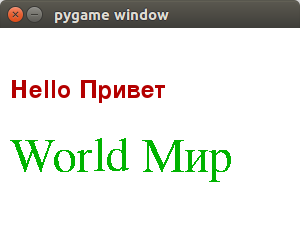

(У самой поверхности нет собственных свойств-координат на родительском окне, а у Rect они есть)

# Модули pygame.image и pygame.transform

Загрузка и сохранение изображений в Pygame

Функция load() модуля pygame.image загружает изображение и создает экземпляр Surface, на котором отображено это изображение. В load() передается имя файла. "Родным" форматом является BMP, однако если функция pygame.image.get_extended() возвращает истину, то можно загружать ряд других форматов: PNG, GIF, JPG и др.

```Py
dog_surf = pg.image.load('dog.bmp')
```
Если у изображения нет прозрачного слоя, но он необходим, то следует воспользоваться методом set_colorkey() класса Surface:
```Py
dog_surf = pg.image.load('dog.bmp')
dog_surf.set_colorkey((255, 255, 255))
```
Все пиксели, цвет которых совпадает с переданным в set_colorkey() значением, станут прозрачными.

Модуль pygame.transform содержит функции для изменения поверхностей.

Функции модуля transform, которые изменяют поверхности, возвращают новые. Первым аргументом им передается исходный Surface. Ниже приведены примеры использования наиболее востребованных функций.

Функция flip() переворачивает Surface по горизонтали и вертикали, к потери качества не приводит. Указывается поверхность и булевыми значениями оси переворота.
```Py
flip = pygame.transform.flip(dog_surf, True, False)
```
pygame.transform.scale и другие

# Классы Sprite и Group

Спрайт - любой подвижный объект. и в большинстве случаев предполагает взаимодействие с ним. Другими словами, все что в игре не является фоном, а интерактивным объектом-картинкой – это спрайт. Спрайт - двумерное изображение, используемое в играх. Класс Sprite предназначен для использования в качестве базового класса для различных типов объектов в игре. Базовый класс для видимых игровых объектов. Производные классы должны переопределить Sprite.update() и назначить атрибуты Sprite.image и Sprite.rect. (Sprite.update() method to control sprite behavior - The default implementation of this method does nothing) Существует также базовый класс Group, который просто хранит спрайты. 

При создании подкласса спрайта обязательно вызывайте инициализатор базового класса перед добавлением спрайта в Groups. Например:
```Py
class Block(pygame.sprite.Sprite):

    # Конструктор. Передайте цвет блока, и его положение по x и y
    def __init__(self, color, width, height):
       # Вызовите конструктор родительского класса (Sprite)
       pygame.sprite.Sprite.__init__(self)

       # Создайте изображение блока и залейте его цветом.
       # Это также может быть изображение, загруженное с диска.
       self.image = pygame.Surface([width, height]) # свойство. изображение спрайта
       self.image.fill(color)

       # Получение объекта прямоугольника, имеющего размеры изображения
       # Обновите положение этого объекта, установив значения rect.x и rect.y
       self.rect = self.image.get_rect() # размер и местоположение спрайта
```
```Py
# пример группы
balls = pygame.sprite.Group()
balls.add(Ball(W//2, 1, 'images/ball_bear.png')) # add() -  add Sprites to this Group.  add(*sprites) -> None
balls.add(Ball(W//2-250, 2, 'images/ball_fox.png'),
          Ball(W//2+100, 3, 'images/ball_panda.png'))

balls.draw(sc)
balls.update(some_paramerer) # Будет перндан в update каждого спрайта
```


Хотя каждый спрайт может быть уникальным, у всех есть нечто общее, что в pygame вынесено в отдельный класс Sprite, находящийся в модуле pygame.sprite.

На базе этого класса следует создавать собственные классы спрайтов и уже от них объекты. Таким образом, класс pygame.sprite.Sprite играет роль своего рода абстрактного класса. Хотя таковым не является, можно создавать объекты непосредственно от Sprite.

В модуле pygame.sprite кроме класса Sprite есть класс Group и родственные ему, которые предназначены для объединения спрайтов в группы. Это позволяет вызывать один метод группы, который, например, обновит состояние всех спрайтов, входящих в эту группу.

Наконец, этот модуль Sprite содержит несколько функций столкновений. Они помогают найти спрайты внутри нескольких групп, которые имеют пересекающиеся ограничивающие прямоугольники. Чтобы найти столкновения, спрайты должны иметь атрибут Surface.rect.

Почти все предопределенные методы класса pygame.sprite.Sprite касаются добавления экземпляра в группу, удаления из нее, проверки вхождения. Только метод update() затрагивает поведение самого спрайта, этот метод следует переопределить в производном от Sprite классе.

Рассмотрим, как это работает. В примерe кода ниже машинка перемещаются сверху вниз. Каждая такая машинка – объект-спрайт, созданный от класса Car, который является дочерним от Sprite.

В конструкторе производного от Sprite класса необходимо вызвать конструктор родительского класса, а также обзавестись экземплярами Surface и Rect, имена которых должны быть соответственно self.image и self.rect. Так надо, чтобы с экземплярами класса могли работать методы группы. В остальном вы можете добавлять любые атрибуты.

Как создается поверхность (а также прямоугольная область), неважно. В примере ниже это делается с помощью функции load(). Однако в конструктор может передаваться уже подготовленный экземпляр Surface.

In [1]:
from random import randint
import pygame as pg
import sys
 
W = 400
H = 400
WHITE = (255, 255, 255)

class Car(pg.sprite.Sprite):
    def __init__(self, x, filename):
        pg.sprite.Sprite.__init__(self)
        self.image: pg.Surface = pg.image.load(
            filename).convert_alpha()
        self.rect: pg.Rect = self.image.get_rect(
            center=(x, 0))
 
    def update(self):
        if self.rect.y < H:
            self.rect.y += 2
        else:
            self.rect.y = 0
 
 
sc = pg.display.set_mode((W, H))
 
# координата x будет случайна
car1 = Car(randint(1, W), 'car1.png') # W//2
 
while 1:
    for i in pg.event.get():
        if i.type == pg.QUIT:
            sys.exit()
 
    sc.fill(WHITE)
    sc.blit(car1.image, car1.rect) # draw one image onto another
    pg.display.update()
    pg.time.delay(20)
 
    car1.update()

pygame 2.4.0 (SDL 2.26.4, Python 3.11.1)
Hello from the pygame community. https://www.pygame.org/contribute.html



- **Sprite**: Спрайт - это просто двухмерный объект, который мы рисуем на экране. Мы можем использовать их, расширяя класс sprite. 
- **Surf**: Поверхности - это как чистые листы бумаги, на которых мы рисуем. Наш экранный объект также является поверхностью. Они также могут содержать изображения. 
- **Rect**: Прямоугольная область, которую мы определяем на поверхности. 

Для примера самого первого:

```Py
class Square(pygame.sprite.Sprite):
 
    def __init__(self):
        super(Square, self).__init__()
        self.surf = pygame.Surface((25, 25))
        self.surf.fill((0, 200, 255))
        self.rect = self.surf.get_rect()
```
Примечание: Мы используем формат цветового кодирования RGB, в котором мы можем формировать различные цвета. Кортеж (0, 0, 0) - это черный цвет, поскольку в нем нет цвета, а кортеж (255, 255, 255) - это белый цвет.
В нашем коде мы расширяем класс sprite, чтобы мы могли использовать поверхности и прямоугольники для рисования наших квадратов. Мы создали поверхность размером 25x25px и залили ее цветом: (0, 200, 255). 

## pygame.init() :
```Py
pygame.init()

screen = pygame.display.set_mode((800, 600))

square1 = Square()
square2 = Square()
square3 = Square()
square4 = Square()

```
Приведенные выше строки кода инициализируют pygame с помощью команды pygame.init(), которая необходима для использования команд модуля pygame. После этого мы определяем наш объект экрана и его размеры в пикселях. Затем в следующих строках мы инициализируем наши четыре квадрата.

## Blit and Flip -

**Blit**: Ключевое слово Blit используется для рисования поверхности (surface) на другой поверхности. Проще говоря, когда мы рисуем поверхность, мы просто накладываем ее на другую поверхность.

**Flip**: Используется для обновления всего экрана после того, как все нарисовано. Помните, что флип работает только после отрисовки всех необходимых поверхностей, иначе он ничего не обновит. 

```Py
screen.blit(square1.surf, (40, 40))
screen.blit(square2.surf, (40, 530))
screen.blit(square3.surf, (730, 40))
screen.blit(square4.surf, (730, 530))

pygame.display.flip()

```
В приведенных выше строках кода сначала мы отрисовываем четыре квадрата на экране, а затем "перелистываем", чтобы они появились. 

Некоторые основные функции:

- **pygame.init()**: Эта команда используется для инициирования модуля pygame. Этот метод инициализирует все необходимые модули pygame. Этот метод не имеет никакого аргумента и возвращает кортеж, который возвращает количество модулей, инициализированных успешно, и количество модулей, не прошедших инициализацию, соответственно. 

- **pygame.display.set_mode((500,500))**: Эта команда используется для создания окна нужного размера (ширина, высота). Возвращаемое значение - объект Surface, который является объектом, где мы выполняем различные графические операции.

- **pygame.display.set_caption(title = "")**: Эта команда используется для установки заголовка окна/доски.

- **pygame.event.get()**: Эта команда используется для очистки очереди событий. Если не вызвать эту команду, сообщения окна начнут накапливаться, и, по мнению операционной системы, игра станет неотзывчивой.

- **pygame.QUIT**: используется для завершения события, когда мы нажимаем на кнопку закрытия в углу окна.

## pygame.draw():

Используется для рисования объекта, фигуры.

Синтаксис: Surface.rect(surface, color, rect)

Ниже приведен код для рисования прямоугольника с помощью метода pygame.draw.rect():
```Py
# Importing the library
import pygame
import time

# Initializing Pygame
pygame.init()

# Creating the surface
sample_surface = pygame.display.set_mode((400,300))

# Choosing red color for the rectangle
color = (255,255,0)

# Drawing Rectangle
pygame.draw.rect(sample_surface, color,
				pygame.Rect(30, 30, 60, 60))

# The pygame.display.flip() method is used
# to update content on the display screen
pygame.display.flip()

```

# Pygame – Time
При использовании pygame нам иногда нужно выполнять определенные операции, которые включают в себя использование времени. Например, узнать, сколько времени работает наша программа, поставить программу на паузу на определенное время и т.д. Для операций такого рода нам необходимо использовать методы времени pygame. Рассмотрим различные методы, которые можно использовать для выполнения этих операций.

Функции, которые мы будем обсуждать, следующие:-

- pygame.time.wait
- pygame.time.get_ticks
- pygame.time.delay
- pygame.time.Clock

 - pygame.time.wait
Эта функция используется для приостановки выполнения программы на несколько секунд. В качестве параметра она принимает время в миллисекундах. Например, для демонстрации этой функции мы напишем простую программу, чтобы логотип geeksforgeeks появлялся на экране только через 5 секунд. Код для этого будет следующим:

In [ ]:
# importing pygame module
import pygame

# importing sys module
import sys

# initialising pygame
pygame.init()

# creating display
display = pygame.display.set_mode((500, 500))

# Creating the image surface
image = pygame.image.load('gfg_logo.png')

# putting our image surface on display surface
display.blit(image,(100,100)) # но не обновили дисплей pygame.display.flip()

# making the script wait for 5000 seconds
pygame.time.wait(5000)

# creating a running loop
while True:

	# creating a loop to check events that are occurring
	for event in pygame.event.get():
		if event.type == pygame.QUIT:
			pygame.quit()
			sys.exit()
	# updating the display
	pygame.display.flip()


Результатом этого будет то, что скрипт подождет 5 секунд, а затем обновит дисплей, чтобы показать логотип geeksforgeeks. 

Он немного менее точен, чем pygame.time.delay, который мы обсудим позже, потому что он использует sleep, а другой использует процессор.

* pygame.time.get_ticks
Эта функция выдает время, которое прошло в миллисекундах.
```Py
while True:
      
    # storing the time in ticks variable
    ticks=pygame.time.get_ticks()
     
    # printing the variable ticks
    print(ticks)
```
Время выводится для каждой итерации, включая время, на которое мы приостанавливали выполнение сценария в каждой итерации.

* pygame.time.delay

Эта функция работает так же, как и функция pygame.time.wait, с той разницей, что эта функция будет использовать процессор (а не sleep), чтобы сделать задержку более точной. Пример кода можно написать так же, как и функцию pygame.time.wait, просто заменив имя.

* pygame.time.Clock

Эта функция используется для создания объекта часов, который можно использовать для отслеживания времени. Ниже приведены различные методы объекта часов:

- **tick()**:Этот метод следует вызывать один раз за кадр. Он вычисляет, сколько миллисекунд прошло с момента предыдущего вызова. Если вы передадите необязательный аргумент framerate, функция будет задерживаться, чтобы игра работала медленнее, чем заданные тики в секунду. Например, если мы передадим 10 в качестве аргумента, программа никогда не будет работать со скоростью более 10 кадров в секунду.

- **get_time()**:используется для получения количества миллисекунд, прошедших между двумя тиками().

- **get_fps()**:дает информацию о частоте кадров. возвращает результат в виде значения с плавающей точкой.

In [ ]:
# importing the pygame module
import pygame

# initialising the pygame
pygame.init()

# declaring a variable i with value 0
i=0

# creating a clock object
clock=pygame.time.Clock()

# creating a loop for 5 iterations
while i<5:
	
	# setting fps of program to max 1 per second
	clock.tick(1)
	
	# printing time used in the previous tick
	print(clock.get_time())
	
	# printing compute the clock framerate
	print(clock.get_fps())
	i=i+1


 Поскольку мы передали 1 в методе tick, он устанавливает максимальное значение fps равным 1. В результате время между каждым кадром приближается к 1000 миллисекунд.

# Input Box

Здесь мы рассмотрим, как читать текст с клавиатуры в pygame. Мы собираемся отобразить наш текст внутри прямоугольника. При наведении мыши на прямоугольник цвет прямоугольника будет меняться.

In [ ]:
# import pygame module
import pygame

# import sys library
import sys

# initializing pygame
pygame.init()

clock = pygame.time.Clock()

# Set the window screen size
display_screen = pygame.display.set_mode((500, 500))

# add font style and size
base_font = pygame.font.Font(None, 40)


# stores text taken by keyboard
user_text = ''

# set left, top, width, height in
# Pygame.Rect()
input_rect = pygame.Rect(200, 200, 140, 32)
color_active = pygame.Color("lightskyblue")
color_passive = pygame.Color("gray15")
color = color_passive

active = False

while True:
	
	for event in pygame.event.get():
		if event.type == pygame.QUIT:
			pygame.quit()
			sys.exit()

		# when mouse collides with the rectangle
		# make active as true
		if event.type == pygame.MOUSEBUTTONDOWN:
			if input_rect.collidepoint(event.pos):
				active = True

		# if the key is physically pressed down
		if event.type == pygame.KEYDOWN:
			if event.key == pygame.K_BACKSPACE:
				
				# stores text except last letter
				user_text = user_text[0:-1]
			else:
				user_text += event.unicode

	display_screen.fill((0, 0, 0))

	if active:
		color = color_active
	else:
		color = color_passive

	pygame.draw.rect(display_screen, color, input_rect)
	
	# render the text
	text_surface = base_font.render(user_text, True, (255, 255, 255))
	display_screen.blit(text_surface, (input_rect.x + 5, input_rect.y + 5))
	input_rect.w = max(100, text_surface.get_width() + 10) # changing width
	pygame.display.flip() # update
	clock.tick(60)


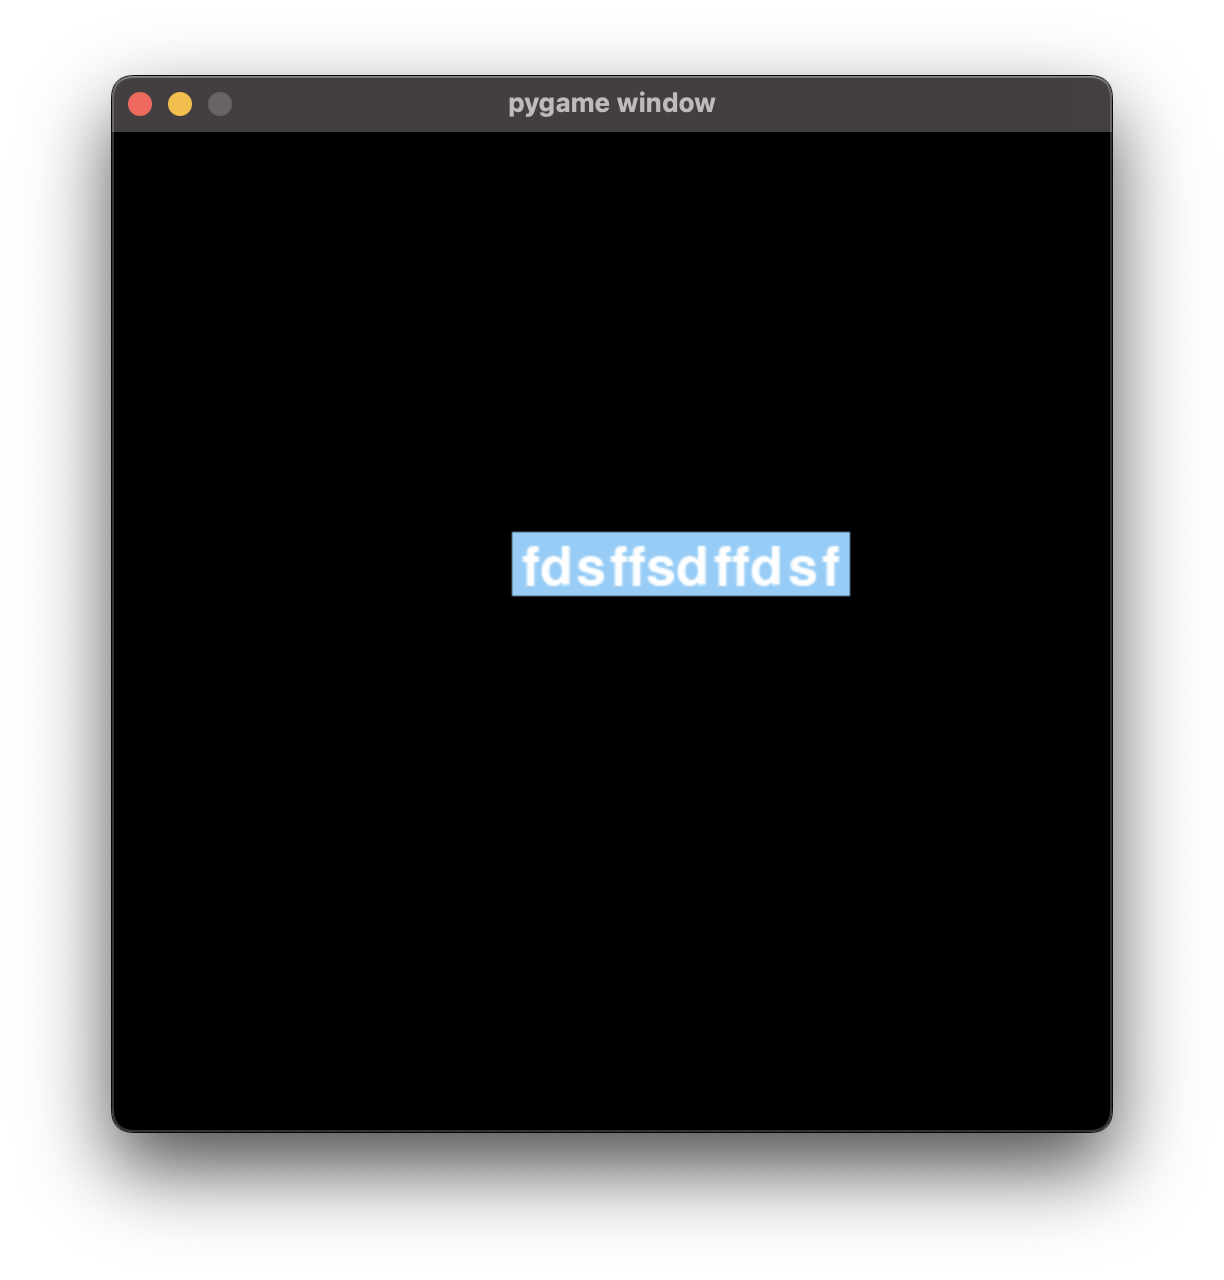

##  Анимации

В pygame анимации создаются при помощи набора спрайтов, которые последовательно отрисовываются:

```Py
animation_set = [pygame.image.load(f"r{i}.png") for i in range(1, 6)]

window = pygame.display.set_mode((640, 480))

clock = pygame.time.Clock()
i = 0
while True:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            pygame.quit()
            sys.exit()

    window.fill((0,0,0))
    window.blit(animation_set[i // 12], (100, 20))
    i += 1
    if i == 60:
        i = 0

    pygame.display.flip()
    clock.tick(60)
```
Создаём список спрайтов, каждый из которых будет отдельным кадром анимации:
```Py
animation_set = [pygame.image.load(f"r{i}.png") for i in range(1, 6)]
```
Создаём часы, для ограничения количества кадров в секунду:
```Py
clock = pygame.time.Clock()
```
Вспомогательная переменная, которая поможет выбирать нужную анимацию в зависимости от номера кадра:
```Py
i = 0
```
Выбор анимации в зависимости от номера кадра и его отрисовка:
```Py
window.blit(animation_set[i // 12], (100, 20))
```
Изменение переменной, помогающей выбрать нужный кадр:
```Py
i += 1
if i == 60:
   i = 0
```
Ограничение количества кадров в секунду, благодаря чему становится проще просчитывать анимации и синхронизировать события:
```Py
clock.tick(60)
```

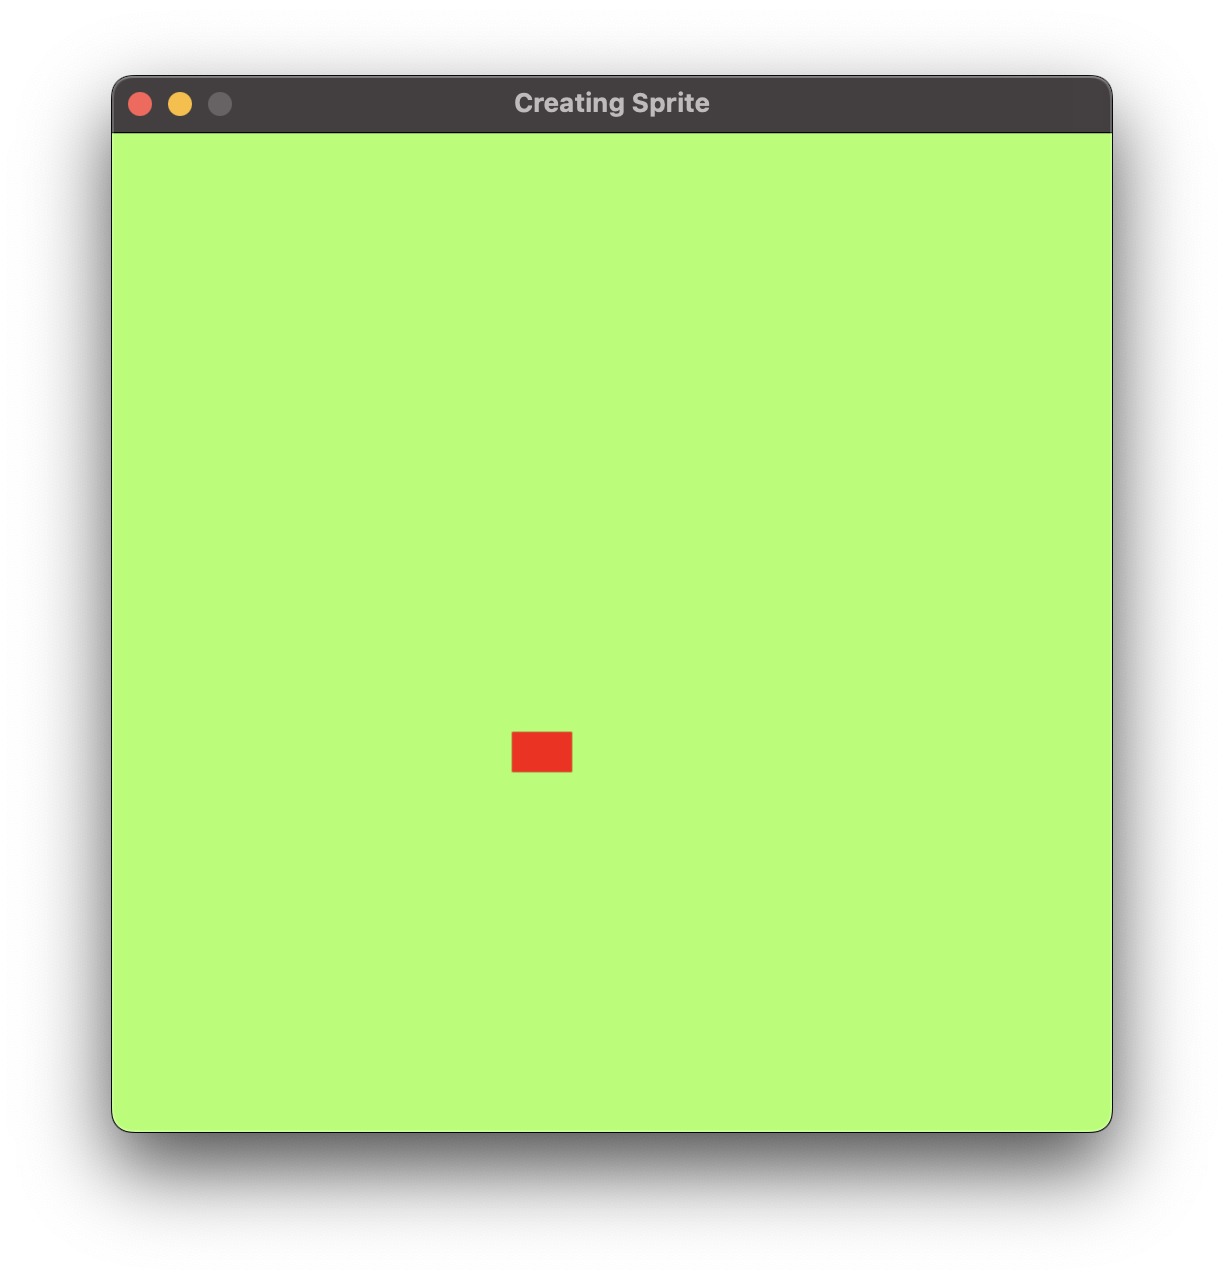

Давайте обсудим, как управлять спрайтом, например, двигаться вперед, назад, замедляться или ускоряться, а также некоторые свойства, которыми должен обладать спрайт. Мы добавим обработчики событий в нашу программу, чтобы реагировать на события нажатия клавиш, когда игрок использует клавиши со стрелками на клавиатуре, мы будем вызывать наши чистые методы для перемещения объекта на экране.

Используемые функции
- moveRight(): Этот метод принимает аргумент pixels, который означает, на сколько пикселей объект должен быть перемещен в правом направлении. По сути, это добавление пикселей к текущей координате x объекта.
- moveLeft(): Этот метод принимает аргумент pixels, который означает, на сколько пикселей объект должен быть перемещен в левом направлении. По сути, это вычитание пикселей из текущей координаты x объекта.
- moveForward(): Этот метод принимает аргумент speed, который означает, во сколько раз увеличится скорость. По сути, это увеличение скорости с коэффициентом n в направлении y объекта.
- moveBackward(): Этот метод принимает аргумент speed, который означает, во сколько раз скорость будет уменьшаться. По сути, это уменьшение скорости с коэффициентом n в направлении y объекта.

Давайте сначала рассмотрим реализацию класса Sprite, который поможет нам создать объект на поверхности PyGame, а также добавит 4 метода, которые помогут нам двигаться вперед, назад, вправо и влево.

Пример: Класс Sprite
```Py
import pygame

# GLOBAL VARIABLES
COLOR = (255, 100, 98)
SURFACE_COLOR = (167, 255, 100)
WIDTH = 500
HEIGHT = 500

# Object class
class Sprite(pygame.sprite.Sprite):
	def __init__(self, color, height, width):
		super().__init__()

		self.image = pygame.Surface([width, height])
		self.image.fill(SURFACE_COLOR)
		self.image.set_colorkey(COLOR)

		# pygame.draw.rect(self.image,color,pygame.Rect(0, 0, width, height))

		self.rect = self.image.get_rect()
		pygame.draw.rect(self.image,color,self.rect)# отрисовка

	def moveRight(self, pixels):
		self.rect.x += pixels

	def moveLeft(self, pixels):
		self.rect.x -= pixels

	def moveForward(self, speed):
		self.rect.y += speed * speed/10

	def moveBack(self, speed):
		self.rect.y -= speed * speed/10

```

Теперь мы увидим, как мы контролируем наш основной цикл программы для работы со спрайтами. Первая часть цикла будет реагировать на события, такие как взаимодействие, когда пользователь использует мышь или клавиатуру. Позже будут использоваться вышеупомянутые методы обработки событий на нашем объекте. Каждый обработчик события будет вызывать соответствующий метод из класса Sprite.

В этом фрагменте кода мы имеем контроль над нашим объектом, т.е. наш объект является объектом в соответствии с заданными нами направлениями, если мы нажмем клавишу со стрелкой вправо, он будет двигаться в этом направлении, и то же самое со всеми клавишами со стрелками. Здесь мы используем метод pygame.KEYDOWN, чтобы инициализировать метод для использования клавиш со стрелками для управления объектами, позже мы должны управлять соответствующим методом, чтобы вызвать конкретную клавишу для выполнения определенного действия.

Например, если у нас есть клавиша со стрелкой вправо, мы должны вызвать метод pygame.K_RIGHT для перемещения вправо в направлении объекта, и аналогично для метода pygame.K_DOWN, который используется для перемещения вверх в направлении объекта.

Пример: Управление спрайтом 

In [1]:
import random
import pygame

# Global Variables
COLOR = (255, 100, 98)
SURFACE_COLOR = (167, 255, 100)
WIDTH = 500
HEIGHT = 500

# Object class
class Sprite(pygame.sprite.Sprite):
	def __init__(self, color, height, width):
		super().__init__()

		self.image = pygame.Surface([width, height])
		self.image.fill(SURFACE_COLOR)
		self.image.set_colorkey(COLOR) # воспринимаем цвет COLOR как прозрачный

		# pygame.draw.rect(self.image,
		# 				color,
		# 				pygame.Rect(0, 0, width, height))

		self.rect = self.image.get_rect() # get_rect(**kwargs) -> Rect
		pygame.draw.rect(self.image,color,self.rect)# Отрисовка.
		
	def moveRight(self, pixels):
		self.rect.x += pixels

	def moveLeft(self, pixels):
		self.rect.x -= pixels

	def moveForward(self, speed):
		self.rect.y += speed * speed/10

	def moveBack(self, speed):
		self.rect.y -= speed * speed/10


pygame.init()


RED = (255, 0, 0)


size = (WIDTH, HEIGHT)
screen = pygame.display.set_mode(size)
pygame.display.set_caption("Creating Sprite")


all_sprites_list = pygame.sprite.Group()

playerCar = Sprite(RED, 20, 30)
playerCar.rect.x = 200
playerCar.rect.y = 300


all_sprites_list.add(playerCar)

exit = True
clock = pygame.time.Clock()

while exit:
	for event in pygame.event.get():
		if event.type == pygame.QUIT:
			exit = False
		elif event.type == pygame.KEYDOWN:
			if event.key == pygame.K_x:
				exit = False

	keys = pygame.key.get_pressed()
	if keys[pygame.K_LEFT]:
		playerCar.moveLeft(10)
	if keys[pygame.K_RIGHT]:
		playerCar.moveRight(10)
	if keys[pygame.K_DOWN]:
		playerCar.moveForward(10)
	if keys[pygame.K_UP]:
		playerCar.moveBack(10)

	all_sprites_list.update()
	screen.fill(SURFACE_COLOR)
	all_sprites_list.draw(screen)
	pygame.display.flip()
	clock.tick(60)

pygame.quit()


pygame 2.4.0 (SDL 2.26.4, Python 3.11.1)
Hello from the pygame community. https://www.pygame.org/contribute.html


# Collision Detection
Обнаружение столкновений - очень частое понятие, которое используется практически во всех играх, таких как пинг-понг, космические захватчики и т.д. Простая и понятная концепция заключается в том, чтобы сопоставить координаты двух объектов и задать условие для возникновения столкновения.

Мы должны уметь определять момент столкновения объектов.

Для этого в классе

pygame.Rect

имеются следующие основные методы:
```
collidepoint(x, y) – проверка попадания точки в прямоугольник;
colliderect(Rect) – проверка пересечения двух прямоугольников;
collidelist(list) – проверка пересечения хотя бы с одним прямоугольником из списка прямоугольников list;
collidelistall(list) – проверка пересечения со всеми прямоугольниками из списка прямоугольников list.
```
Полный их список и описание можно посмотреть на странице официальной документации:

https://www.pygame.org/docs/ref/rect.html

Игра. Ловим шар.

Рассмотрим пример с collidepoint(x, y)

    pygame.Rect.collidepoint( (x, y) )

где (x, y) – центр шара. То есть, как только центр шара оказывается в области телеги, то он считается пойманным:

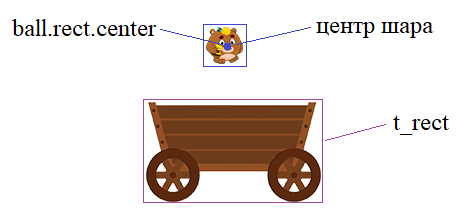

Для отслеживания такого столкновения шаров с телегой объявим вспомогательную функцию:
```Py
def collideBalls():
    global game_score
    for ball in balls:
        if t_rect.collidepoint(ball.rect.center):
            game_score += ball.score
            ball.kill()
```
Мы здесь в цикле перебираем группу из падающих шаров balls и для каждого шара проверяем: попадает ли его центр в прямоугольник телеги t_rect. И если это так, то увеличиваем число очков и удаляем шар из группы.

Затем, в главный цикл игры добавляем вызов этой функции (последней строчкой):
```Py
collideBalls()
```

Все, мы сделали контроль столкновения и начисления очков при поимке того или иного шара телегой.
Загрузим фоновое изображение для очков:
```Py
score = pygame.image.load('images/score_fon.png').convert_alpha()
```
определим шрифт для отображения цифр:
```Py
f = pygame.font.SysFont('arial', 30)
```
Отобразим набранные очки в главном игровом цикле:
```Py
sc_text = f.render(str(game_score), 1, (94, 138, 14))
sc.blit(sc_text, (20, 10))
```

Главный игровой цикл:
```
sc.blit(bg, (0, 0))
balls.draw(sc)
sc.blit(score, (0, 0))
sc_text = f.render(str(game_score), 1, (94, 138, 14))
sc.blit(sc_text, (20, 10))
sc.blit(telega, t_rect)
pygame.display.update()
```
Последовательность отрисовки важна, чтобы объекты правильно перекрывали друг друга.

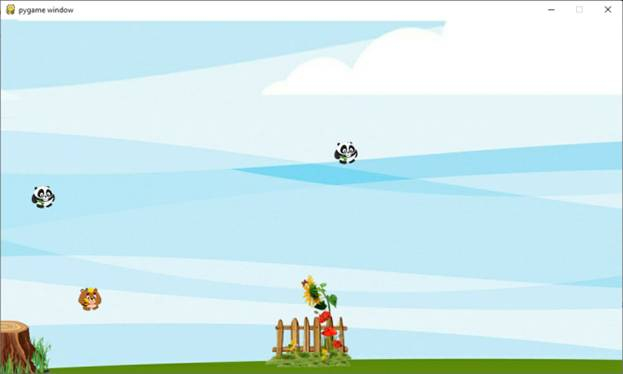

```Py
pygame.time.set_timer(pygame.USEREVENT, 2000) # таймер, который каждые 2000 мс (то есть, 2 сек) будет генерировать событие USEREVENT

createBall(balls)
 
while True:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            exit()
        elif event.type == pygame.USEREVENT:
            createBall(balls)
 
    sc.blit(bg, (0, 0))
    balls.draw(sc)
    pygame.display.update()
 
    clock.tick(FPS)
 
    balls.update(H)
```

# Пример с прыжком

In [ ]:

import pygame
 
pygame.init()
 
W = 600
H = 400
 
sc = pygame.display.set_mode((W, H))
pygame.display.set_caption("Класс Rect")
# pygame.display.set_icon(pygame.image.load("app.bmp"))
 
WHITE = (255, 255, 255)
BLUE = (0, 0, 255)
GREEN = (0, 255, 0)
RED = (255, 0, 0)
 
FPS = 60        # число кадров в секунду
clock = pygame.time.Clock()

ground = H-70    # уровень земли, на которой будет находиться герой
jump_force = 20     # сила прыжка
move = jump_force+1 # текущая вертикальная скорость. если корость больче, чем сила прыжка, то герой не прыгает, а стоит. далее условие if move > j_f, то герой не прыгает

hero = pygame.Surface((40, 50)) # w, h
hero.fill(BLUE)
rect = hero.get_rect(centerx=W//2)# instance of Rect. центрируем персонажа
rect.bottom = ground # ставим персонажа на уровне земли 

while 1:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            exit()
        elif event.type == pygame.KEYDOWN:
            if event.key == pygame.K_SPACE and ground == rect.bottom: # Если пробел и персонаж на земле
                move = -jump_force # начальную скорость устанавливаем в -j_f. минус, чтобы герой прыгал вверх.

    # обрабатываем прыжок
    if move <= jump_force: # если его вертикальная скорость <= силе прыжка
        if rect.bottom + move < ground: # проверка, чтобы герой не оказался ниже уровня земли
            rect.bottom += move # меняем позицию прямоуголькика
            if move < jump_force: # ограничение скорости move
                # move будет -20:+20
                move += 1 # после перемещения героя увеличиваем вертикальную скорость на 1. (на самом деле уменьшается). Герой двигаясь вверх будет замедляться. Потом, когда move станет положительным, то герой будет опускаться вниз к земле.
        else: # если условие не сработало, то герой достиг земли
            rect.bottom = ground # ставим героя на землю
            move = jump_force+1 # устанавливаем move в начальное значение. И условие move <= jump_force не будет срабатывать
    
    sc.fill(WHITE) 
    sc.blit(hero, rect) # отображаем объект. Второй аргумент (dest) может быть либо парой координат, представляющих положение верхнего левого угла, либо Rect, где верхний левый угол прямоугольника будет использоваться в качестве позиции.
    pygame.display.update()
 
    clock.tick(FPS)

# Grid example. Пример

Сетка в python pygame используется для таких игр, как крестики-нолики, майнсвипер и многих других. 


* Во-первых, мы импортируем pygame. Функция ```pygame.init()``` используется для инициализации всех необходимых модулей pygame.
* После этого мы определим некоторые цвета: черный, белый и красный. (Лучше будет их импортировать)
* Теперь зададим ширину и высоту каждого места сетки. MARGIN = 5 установит отступ между каждой ячейкой.
* Нам нужно создать двумерный массив. Двумерный массив - это просто список списков.
* Пустой список создается grid = []. Также, в цикле для каждой строки, создается список, который будет представлять целую строку. Для добавления ячейки мы будем использовать ```grid[row].append(0)```.
* Значение grid[1][5] = 1 установит строку как 1, а столбец как 5 к одному.
* Установите высоту и ширину экрана с помощью window_size = [255, 255].
* Также установите заголовок экрана с помощью pygame.display.set_caption("Grid"). Выполняйте цикл до тех пор, пока пользователь не нажмет кнопку закрытия.
* Для управления скоростью обновления экрана используется pygame.time.Clock().
* Главный цикл используется для события clicked. Если пользователь щелкнул мышью, то получите позицию.
* Также измените координаты экрана x/y на координаты сетки.
* Установите фон экрана как scr.fill(black).
* ```for row in range(10)``` используется для рисования сетки. clock.tick(50) - это предел кадров в секунду.
* ```pygame.display.flip()``` используется для обновления на экране того, что мы нарисовали.

In [ ]:
import pygame

black = (0, 0, 0)
white = (255, 255, 255)
red = (255, 0, 0)
WIDTH = 20
HEIGHT = 20
MARGIN = 5



grid = []
for row in range(10): # list comprehensions?
    grid.append([])
    for column in range(10):
        grid[row].append(0) 

grid[1][5] = 1 # 1:5 will be red by default
pygame.init()
window_size = [255, 255]
scr = pygame.display.set_mode(window_size)
pygame.display.set_caption("Grid")


done = False
clock = pygame.time.Clock()
while not done:
    for event in pygame.event.get(): 
        if event.type == pygame.QUIT: 
            done = True 


        elif event.type == pygame.MOUSEBUTTONDOWN:
            pos = pygame.mouse.get_pos() # get the mouse cursor position  get_pos() -> (x, y)
            column = pos[0] // (WIDTH + MARGIN)
            row = pos[1] // (HEIGHT + MARGIN)
            grid[row][column] = 1
            print("Click ", pos, "Grid coordinates: ", row, column)
    scr.fill(black)
    for row in range(10): # draw rectangles
        for column in range(10):
            color = white
            if grid[row][column] == 1:
                color = red
            pygame.draw.rect(scr,
                             color,
                             [(MARGIN + WIDTH) * column + MARGIN,
                              (MARGIN + HEIGHT) * row + MARGIN,
                              WIDTH,
                              HEIGHT])
    clock.tick(50)
    pygame.display.flip()
pygame.quit()

В output мы видим, что при нажатии на экран мы получаем положение мыши при нажатии и координаты.
```
Click  (56, 160) Grid coordinates:  6 2
Click  (151, 149) Grid coordinates:  5 6
Click  (202, 80) Grid coordinates:  3 8
Click  (85, 80) Grid coordinates:  3 3
Click  (57, 69) Grid coordinates:  2 2
Click  (68, 68) Grid coordinates:  2 2
```

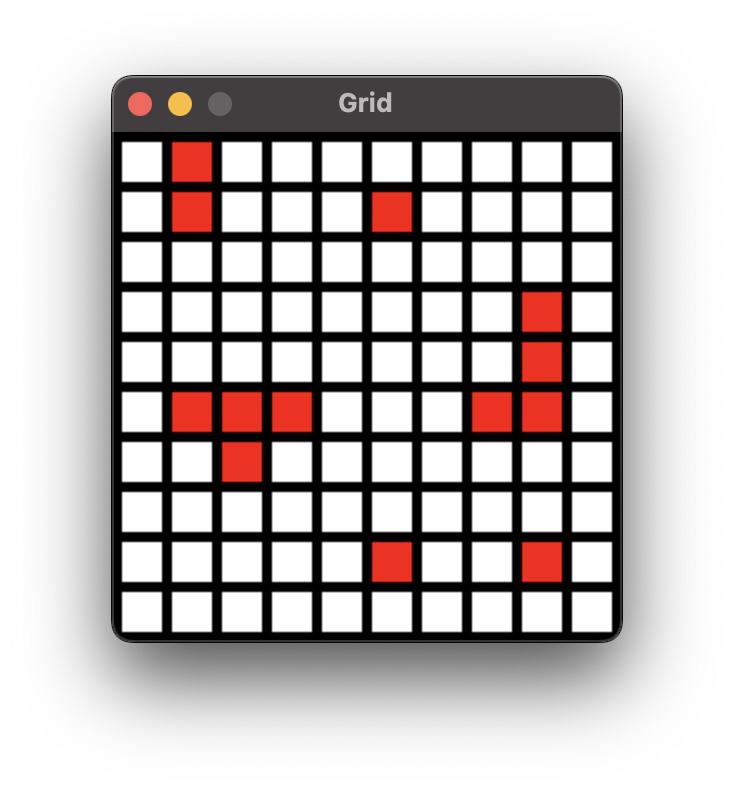